In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime
import spacy
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

In [13]:
data = pd.read_pickle("../data_processed/complete_data_per_school.pk")

In [14]:
data["mois"].value_counts()

Septembre    12799
Janvier      12188
Juin         11817
Novembre     11640
Mai          10348
Mars          9562
Octobre       8684
Decembre      8496
Fevrier       8318
Avril         8056
Juillet       2187
Name: mois, dtype: int64

In [15]:
data["jour"].value_counts()

Vendredi    26287
Mardi       26201
Lundi       25498
Jeudi       25323
Mercredi      786
Name: jour, dtype: int64

In [16]:
data_global = pd.read_pickle("../data_processed/global.pk")
print(data_global.shape)
data_global.head()

(1188, 34)


prevision     reel  effectif  taux_grevistes  nos  ind  \
date                                                                 
2011-01-03    12289.0  11129.0   17373.0             1.1  1.0  0.0   
2011-01-04    12558.0  11808.0   17373.0             0.0  0.0  0.0   
2011-01-06    12753.0  11741.0   17373.0             0.0  0.0  0.0   
2011-01-07    12812.0  12322.0   17373.0             0.0  0.0  0.0   
2011-01-10    12309.0  11302.0   17373.0             0.0  0.0  0.0   

            greves_manquantes  \
date                            
2011-01-03                0.0   
2011-01-04                0.0   
2011-01-06                0.0   
2011-01-07                0.0   
2011-01-10                0.0   

                                                         menu  ferie  \
date                                                                   
2011-01-03  [Pamplemousse, Hachis Parmentier, Salade verte...    0.0   
2011-01-04  [Crêpe au fromage, emincé de volaille à la for...    0.0   
2011-01-06  [thon, Mâche au thon, Croziflette, des de cana...    0.0   
2011-01-07  [Choux blancs mimolette, milanette en des, fil...    0.0   
2011-01-10  [Endives / demi-uf, paella de la mer, Fromage...    0.0   

            veille_ferie  retour_ferie  vacances  retour_vacances  \
date                                                                
2011-01-03           0.0           0.0       0.0              1.0   
2011-01-04           0.0           0.0       0.0              0.0   
2011-01-06           0.0           0.0       0.0              0.0   
2011-01-07           0.0           0.0       0.0              0.0   
2011-01-10           0.0           0.0       0.0              0.0   

            veille_vacances  inc_grippe  inc_gastro  inc_varicelle  \
date                                                                 
2011-01-03              0.0       10505        6554            551   
2011-01-04              0.0       10505        6554            551   
2011-01-06              0.0       10505        6554            551   
2011-01-07              0.0       10505        6554            551   
2011-01-10              0.0        7200        6453            493   

            fete_musulmane  ramadan  fete_chretienne  fete_juive      jour  \
date                                                                         
2011-01-03             0.0      0.0              0.0         0.0     Lundi   
2011-01-04             0.0      0.0              0.0         0.0     Mardi   
2011-01-06             0.0      0.0              1.0         0.0     Jeudi   
2011-01-07             0.0      0.0              1.0         0.0  Vendredi   
2011-01-10             0.0      0.0              0.0         0.0     Lundi   

            semaine     mois annee_scolaire  repas_noel  gaspillage_volume  \
date                                                                         
2011-01-03        1  Janvier      2010-2011         0.0             1160.0   
2011-01-04        1  Janvier      2010-2011         0.0              750.0   
2011-01-06        1  Janvier      2010-2011         0.0             1012.0   
2011-01-07        1  Janvier      2010-2011         0.0              490.0   
2011-01-10        2  Janvier      2010-2011         0.0             1007.0   

            gaspillage_pourcentage  porc  viande  poisson  bio  \
date                                                             
2011-01-03                9.439336     0       1        0  NaN   
2011-01-04                5.972289     0       1        0  NaN   
2011-01-06                7.935388     1       1        0  NaN   
2011-01-07                3.824539     0       0        1  NaN   
2011-01-10                8.181006     0       0        1  NaN   

            4_premiers_jours  4_derniers_jours  
date                                            
2011-01-03               0.0               0.0  
2011-01-04               0.0               0.0  
2011-01-06               0.0               0.0  
2011-01

# 1. Etude des rolling paramètres et p-values par etablissement

In [38]:
data["etab"] = data["nom_etab"].apply(lambda x: x.replace('/', '-') if "/" in x else x)

liste_etab = [i for i in set(data["etab"]) if i not in ["emile_pehant_m", "emile_pehant_e", "alain_fournier_m_e", 'alain_fournier_e']]



In [24]:
window_size = 360
dic = {}
for etab in liste_etab:
    print("etab", etab)
    dic[etab] = {}
    for i in ["params", "pval"]:
        try:
            dic[etab][i] = pd.read_pickle("../results/rolling/etablissement/rolling_"+i+"_etablissement_"+ etab +"_"+ str(window_size) +".pk")
        except:
            dic[etab][i] = {}

etab ampere_m_e
etab georges_brassens_m
etab maurice_mace_m_e
etab contrie_m_e
etab pauline_kergomard_m
etab maurice_mace_e
etab jean_zay_e
etab chene_d'aron_m
etab boccage_e
etab reformes_m_e
etab bottiere_m_e
etab gustave_roch_m
etab aime_cesaire_m_e
etab beaujoire_m_e
etab linot_m_e
etab garennes_e
etab julien_gracq_m_e
etab ange_guepin_e
etab mulotiere_e
etab stalingrad_m
etab jacques_prevert_m_e
etab mutualite_e
etab jacques_tati_m_e
etab marsauderies_e
etab charles_lebourg_m_e
etab maisdon_pajot_m
etab port_boyer_m_e
etab emile_pehant_m_e
etab plantes_m_e
etab louis_guiotton_m
etab stalingrad_e
etab joneliere_m_e
etab louise_michel_m_e
etab moliere_m
etab jean_jaures_e
etab marsauderies_m
etab sully_m_e
etab ledru_rollin_sarah_bernhardt_m_e
etab barberie_m_e
etab alphonse_braud_m_e
etab jean_moulin_m_e
etab alain_fournier_e
etab joseph_blanchart_m
etab paul_gauguin_m_e
etab harouys_m_e
etab francois_dallet_docteur_teillais_m_e
etab fredureau_m
etab grand_carcouet_m_e
etab louis_p

In [25]:
dic[etab]["params"]

Avril   Decembre    Fevrier    Janvier       Juin        Mai  \
date                                                                           
2013-09-26  20.497667  23.136975  15.977442  20.670867  12.431366  22.133551   
2013-09-27  20.482343  23.119082  15.962964  20.834288  12.417098  22.116566   
2013-09-30  20.423145  23.063092  15.904463  20.793731  12.356655  22.055988   
2013-10-01  20.402806  23.043112  15.884196  20.715083  12.336190  22.035508   
2013-10-03  20.354841  22.998991  15.838092  20.272617  12.286707  21.983879   
...               ...        ...        ...        ...        ...        ...   
2019-12-09  -1.349988  -9.687957  -3.641653  -2.006308  -5.365430  -3.366034   
2019-12-10  -1.449152  -9.233918  -3.732918  -2.079234  -5.462609  -3.465544   
2019-12-13  -1.486739  -9.133988  -3.769645  -2.162924  -5.498392  -3.502714   
2019-12-16  -1.392842  -9.578011  -3.684194  -2.107590  -5.407690  -3.408203   
2019-12-19  -1.539264  -8.938158  -3.823642  -2.190462  -5.540947  -3.553195   

                 Mars   Novembre    Octobre  Septembre  effectif  repas_noel  \
date                                                                           
2013-09-26  21.479380  23.375222  23.739972  20.532248  0.751694    0.023402   
2013-09-27  21.462404  23.357930  23.722604  20.579513  0.751641    0.023529   
2013-09-30  21.401833  23.297146  23.665482  20.690901  0.751780    0.023614   
2013-10-01  21.381357  23.276663  23.645033  20.745098  0.751851    0.023585   
2013-10-03  21.329734  23.224356  23.596152  20.878408  0.751789    0.023495   
...               ...        ...        ...        ...       ...         ...   
2019-12-09  -0.061252  -3.759157  -2.288552  -8.159532  0.905967    0.041986   
2019-12-10  -0.163496  -3.862526  -2.398058  -8.268996  0.906243    0.040008   
2019-12-13  -0.197208  -3.902543  -2.432763  -8.305931  0.906356    0.039503   
2019-12-16  -0.101874  -3.804679  -2.330968  -8.202742  0.906153    0.041419   
2019-12-19  -0.226123  -3.960365  -2.459037  -8.344015  0.906445    0.038567   

            Lundi_avec_poisson  Lundi_sans_poisson  Mardi_avec_poisson  \
date                                                                     
2013-09-26        1.394683e-02           -0.016082        5.740176e-17   
2013-09-27        1.335262e-02           -0.015602        1.700905e-16   
2013-09-30        1.337451e-02           -0.015598       -2.452853e-17   
2013-10-01        1.361542e-02           -0.015597        1.126213e-16   
2013-10-03        1.542979e-02           -0.015252        7.978267e-17   
...                        ...                 ...                 ...   
2019-12-09        4.987260e-16           -0.009379        3.176765e-02   
2019-12-10       -9.679181e-16           -0.008865        3.184048e-02   
2019-12-13        1.348864e-15           -0.008932        3.192428e-02   
2019-12-16       -7.460837e-16           -0.009508        3.181744e-02   
2019-12-19       -3.648331e-16           -0.009579        3.196206e-02   

            Mardi_sans_poisson  Jeudi_avec_poisson  Jeudi_sans_poisson  \
date                                                                     
2013-09-26            0.011303                 0.0            0.018011   
2013-09-27            0.011294                 0.0            0.018008   
2013-09-30            0.011687                 0.0            0.018007   
2013-10-01            0.011691                 0.0            0.018044   
2013-10-03            0.012058                 0.0            0.018371   
...                        ...                 ...                 ...   
2019-12-09            0.008231                 0.0            0.003895   
2019-12-10            0.008168                 0.0            0.003884   
2019-12-13            0.008328                 0.0            0.003899   
2019-12-16            0.008297                 0.0            0.003860   
2019-12-19            0.009201                 0.0            0.004008   

        

etab ampere_m_e


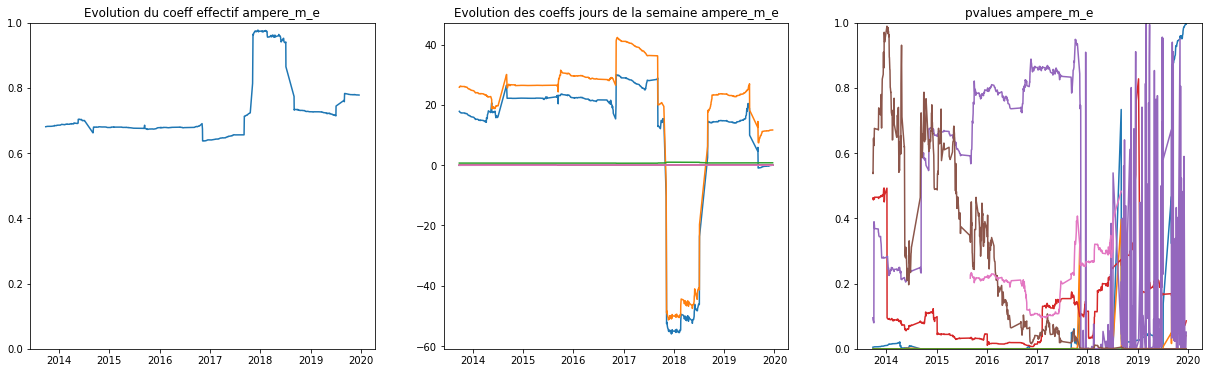

etab georges_brassens_m


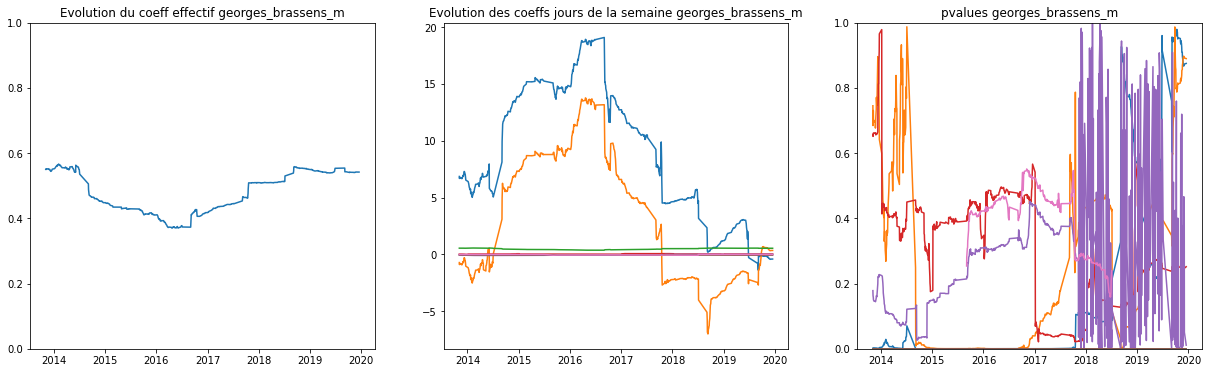

etab maurice_mace_m_e


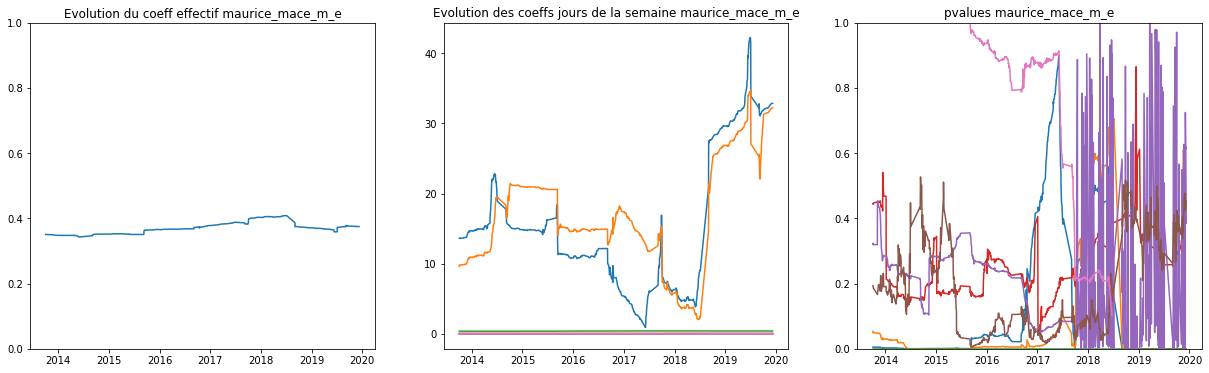

etab contrie_m_e


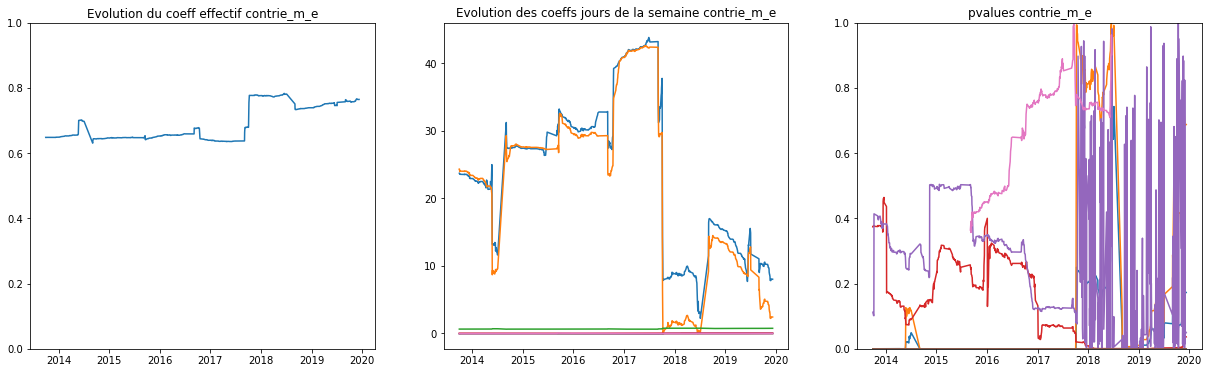

etab pauline_kergomard_m


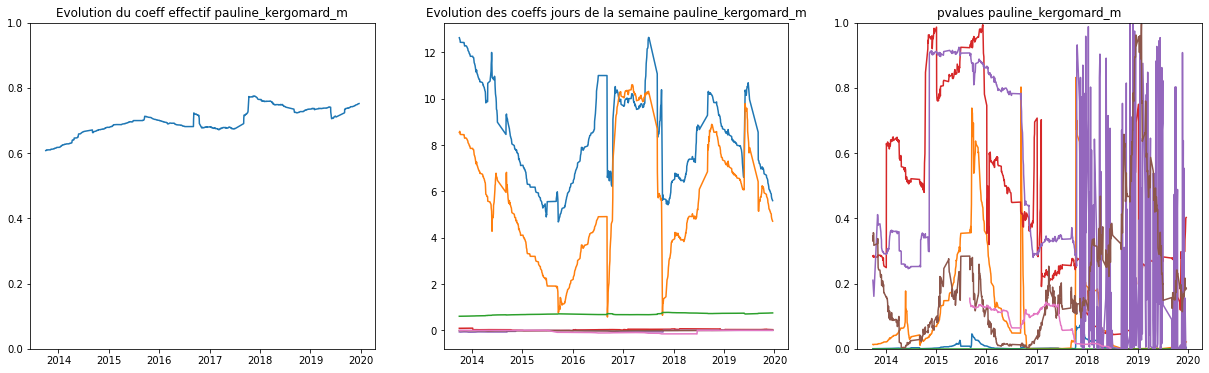

etab maurice_mace_e


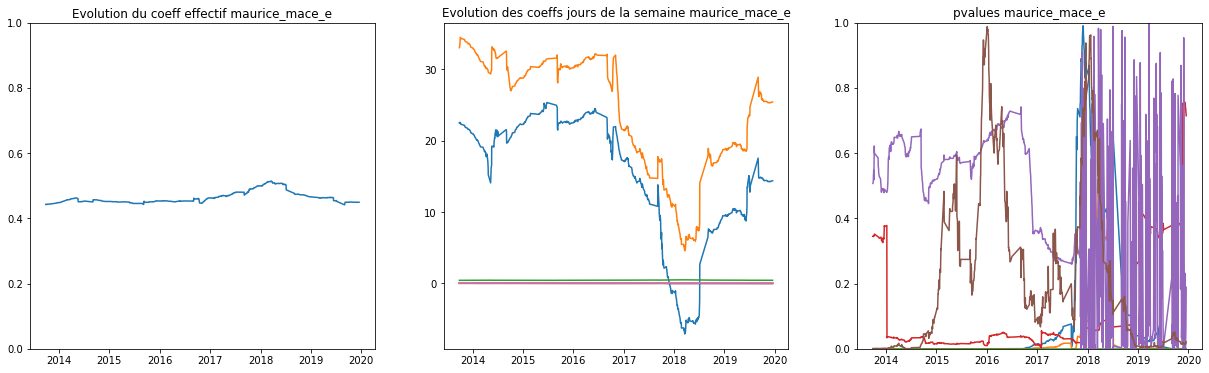

etab jean_zay_e


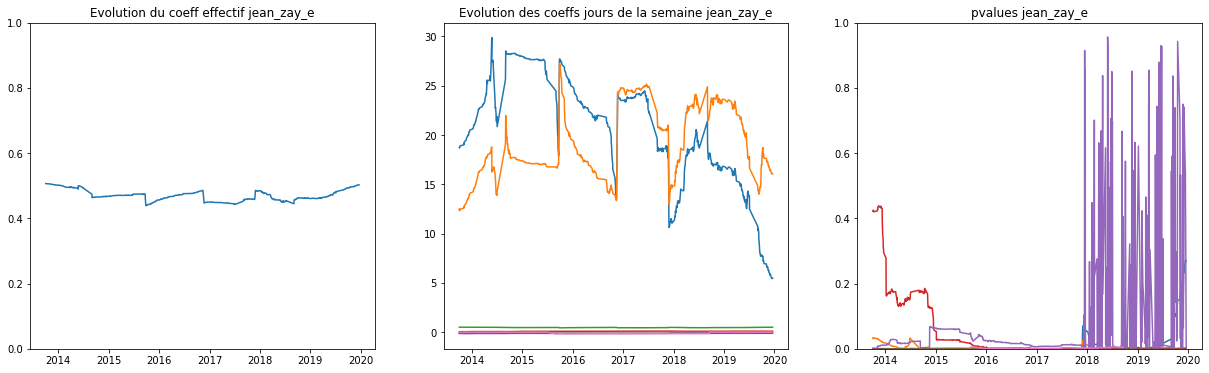

etab chene_d'aron_m


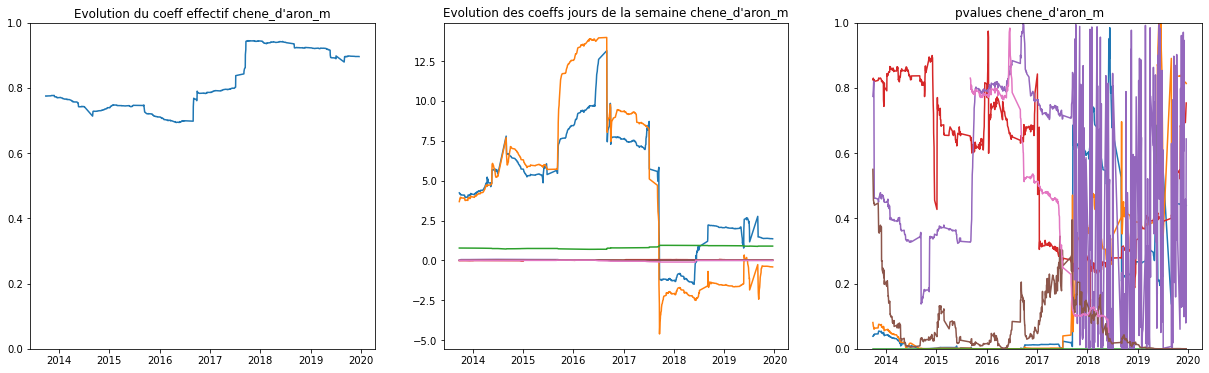

etab boccage_e


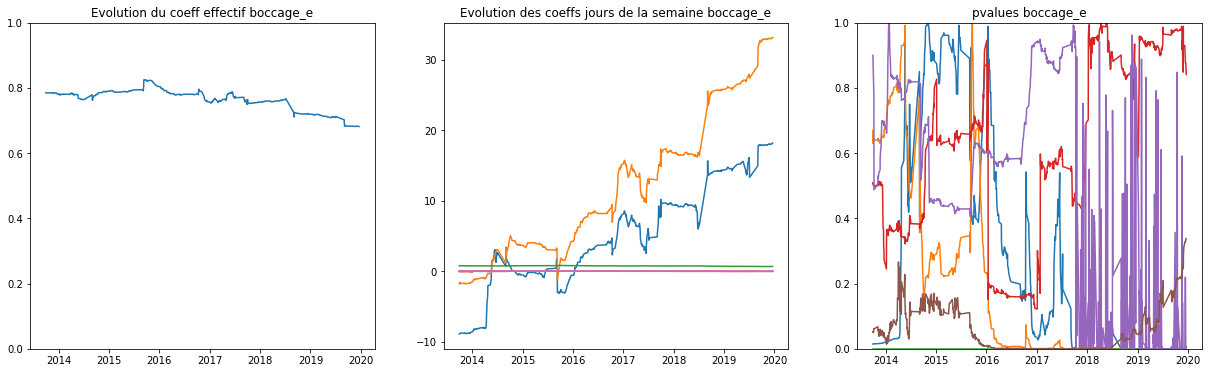

etab reformes_m_e


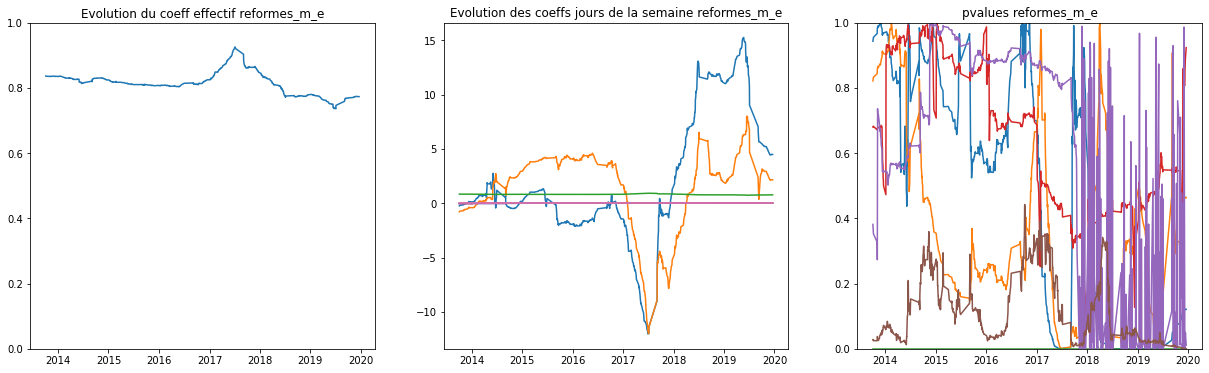

etab bottiere_m_e


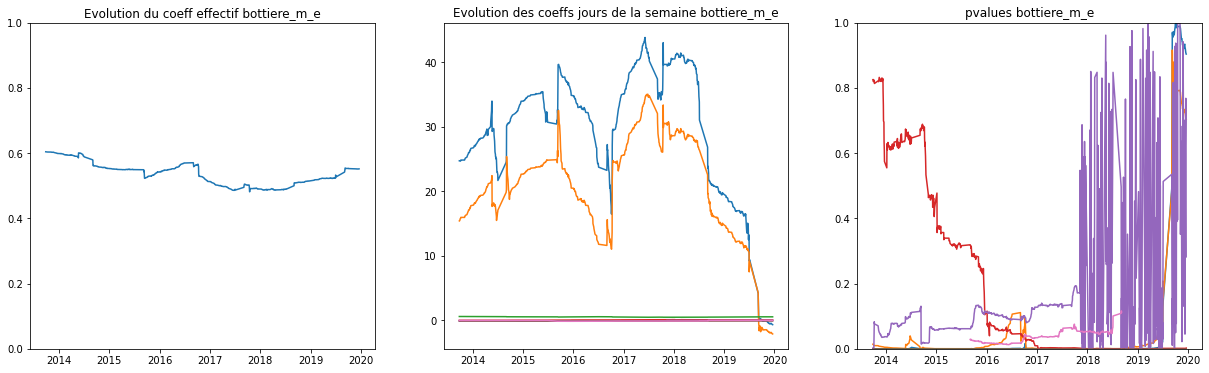

etab gustave_roch_m


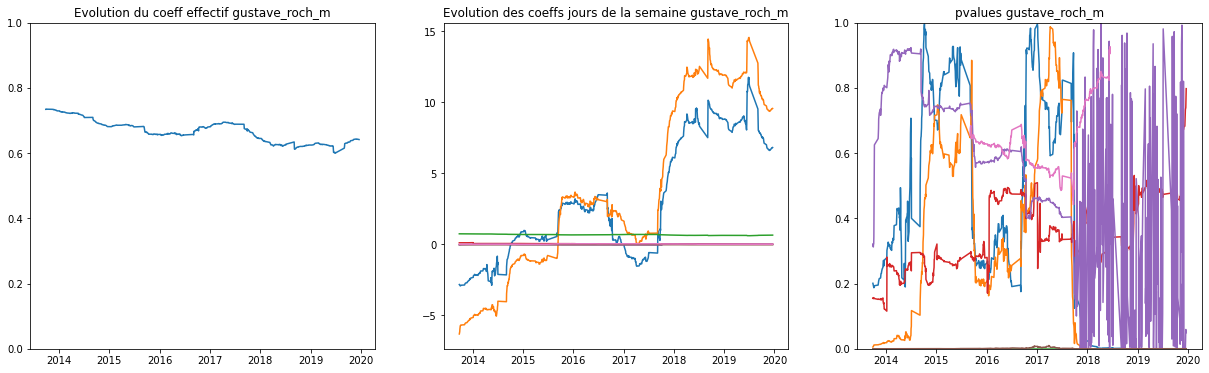

etab aime_cesaire_m_e


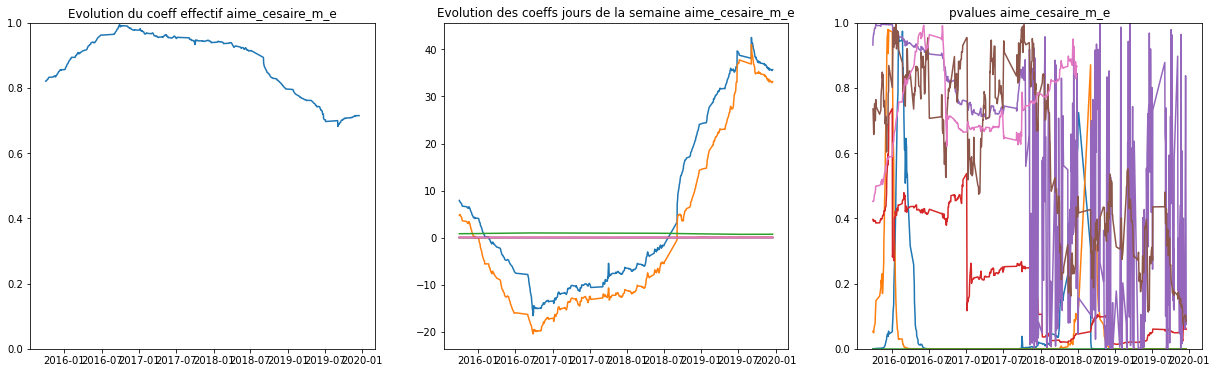

etab beaujoire_m_e


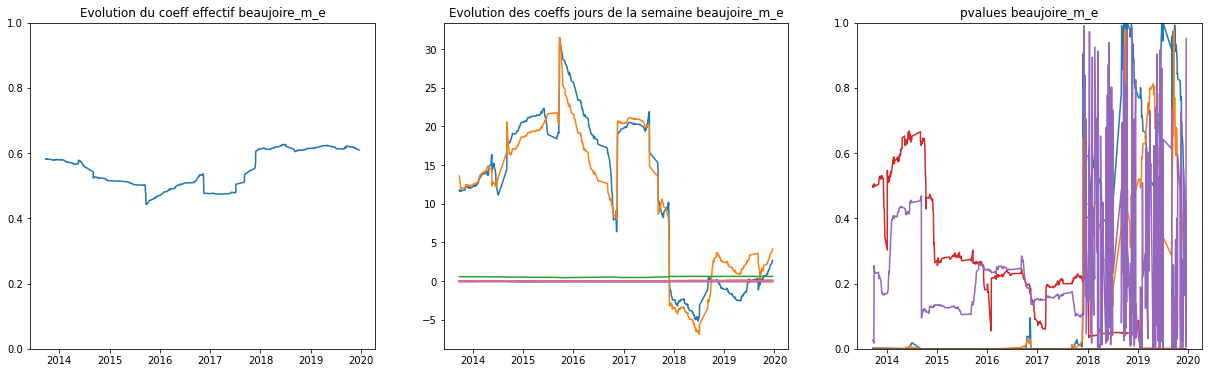

etab linot_m_e


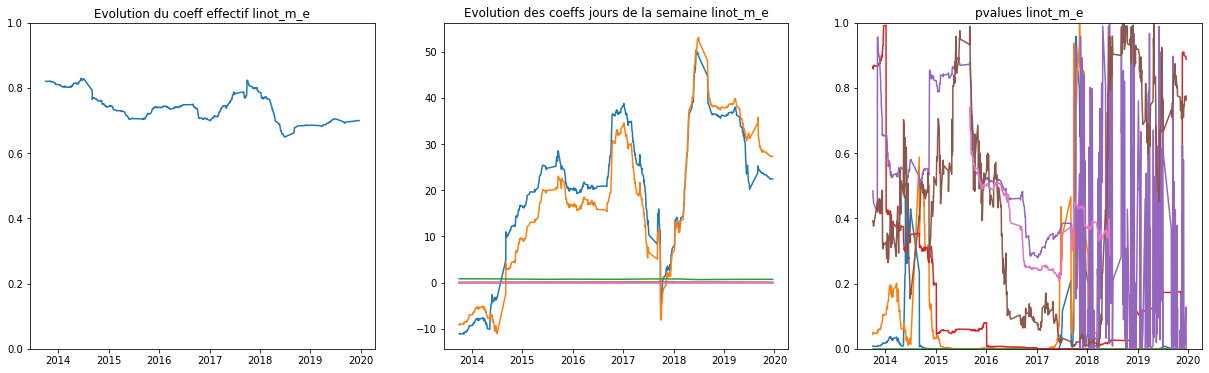

etab garennes_e


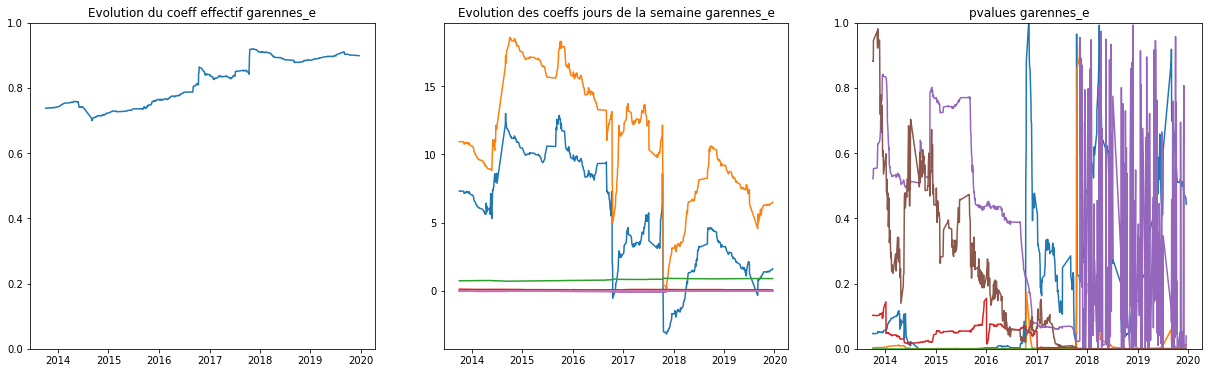

etab julien_gracq_m_e


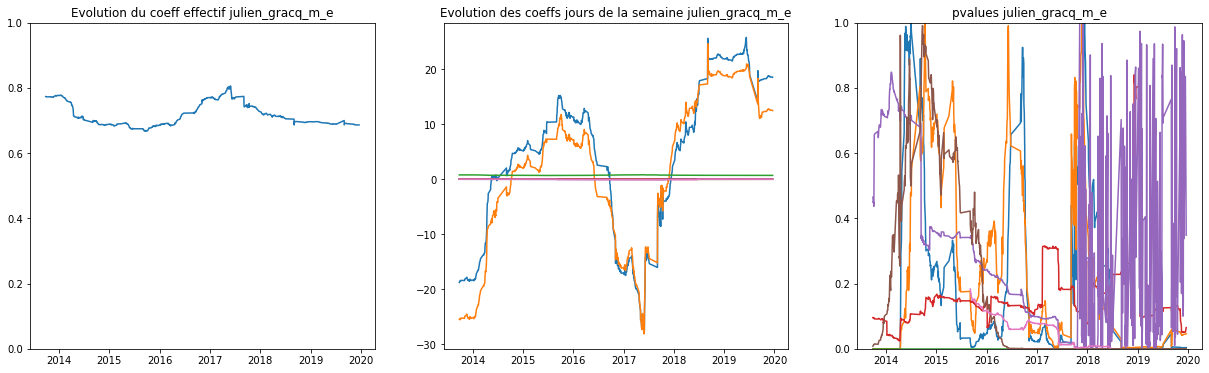

etab ange_guepin_e


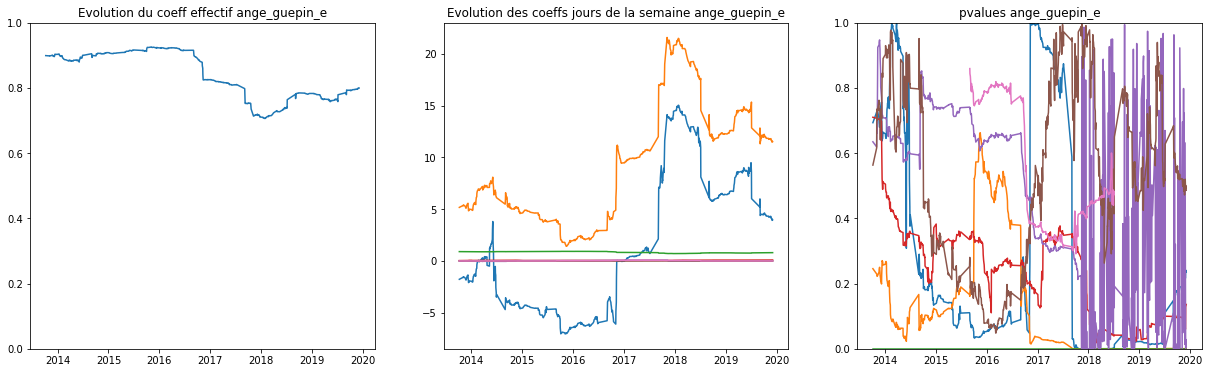

etab mulotiere_e


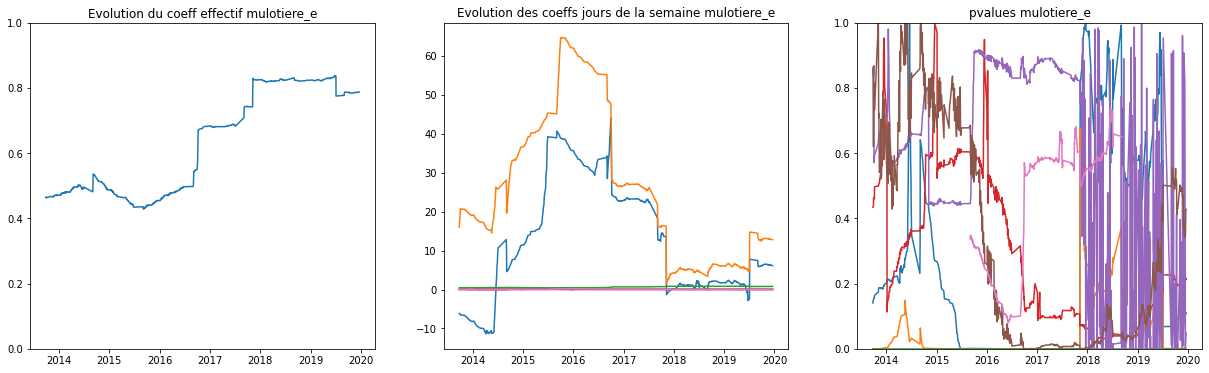

etab stalingrad_m


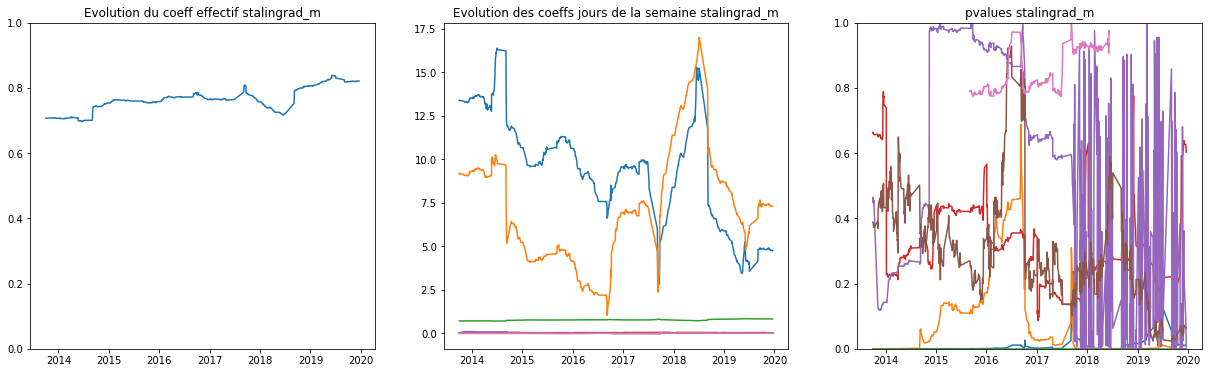

etab jacques_prevert_m_e


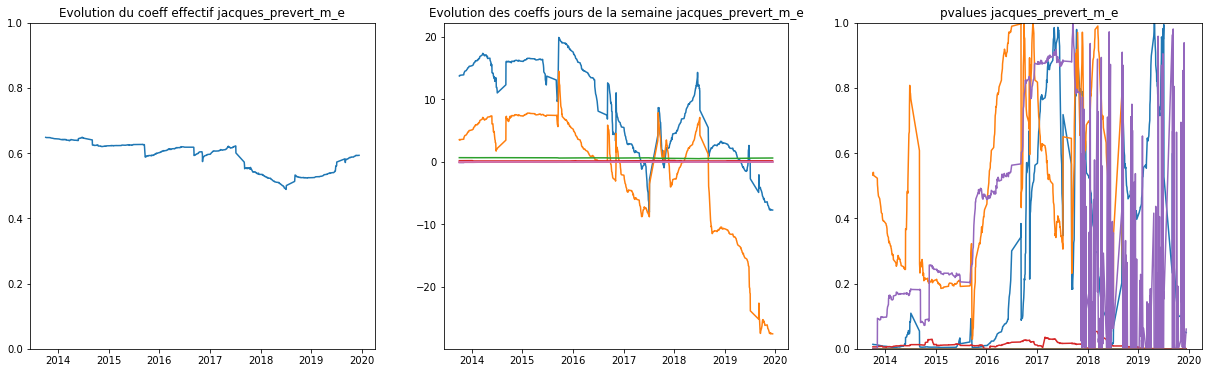

etab mutualite_e


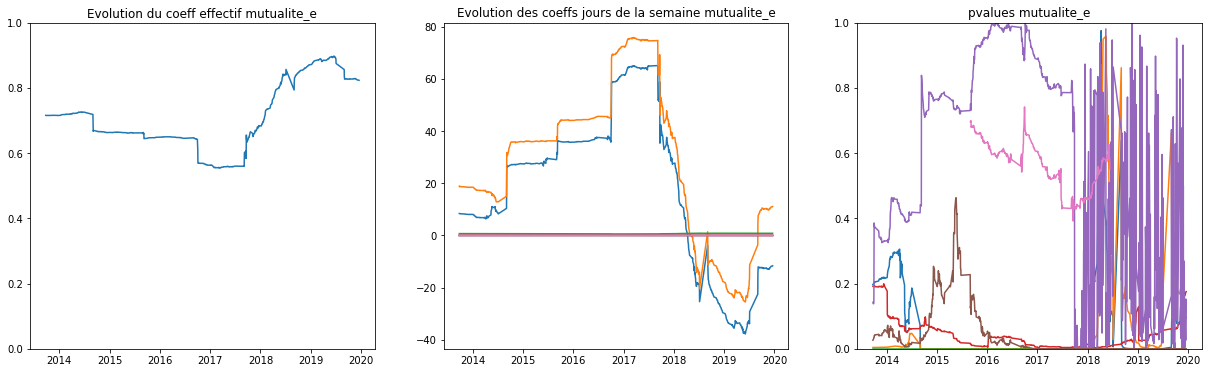

etab jacques_tati_m_e


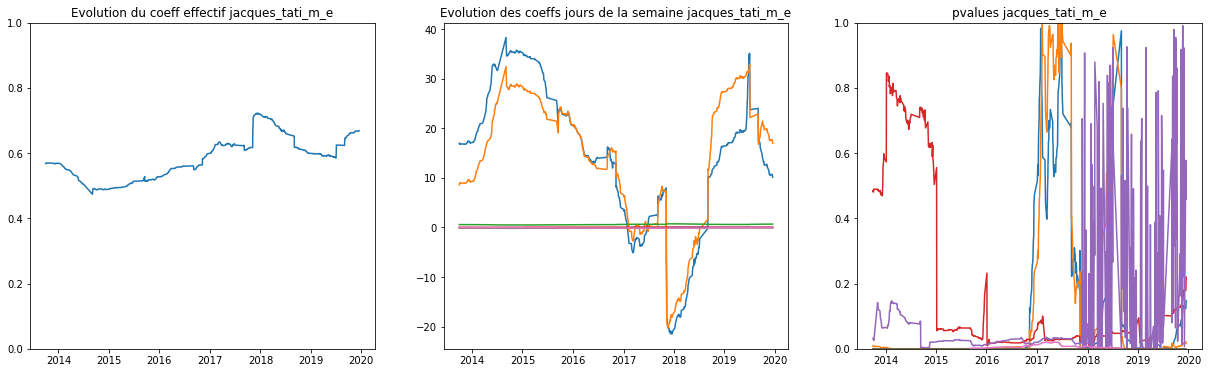

etab marsauderies_e


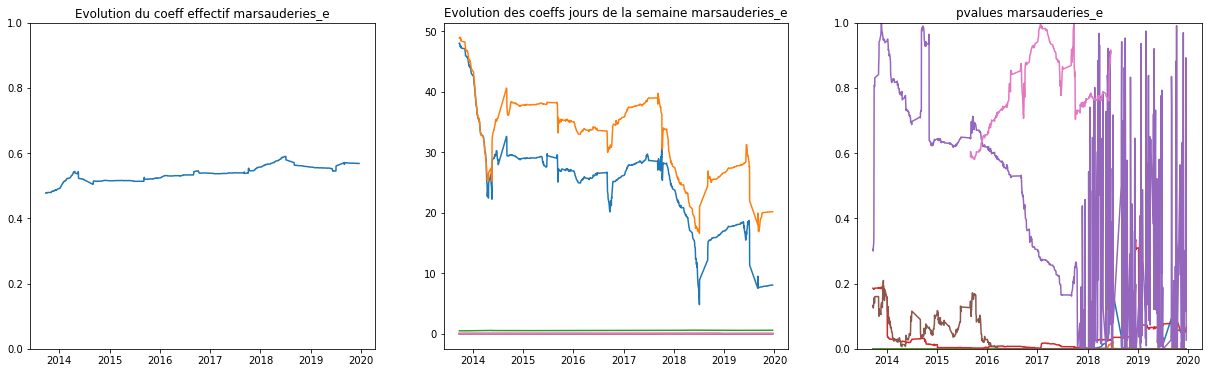

etab charles_lebourg_m_e


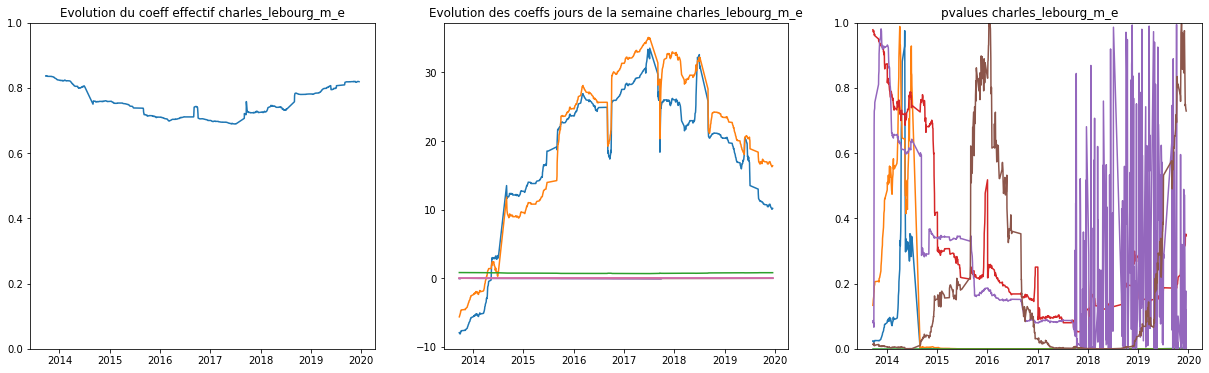

etab maisdon_pajot_m


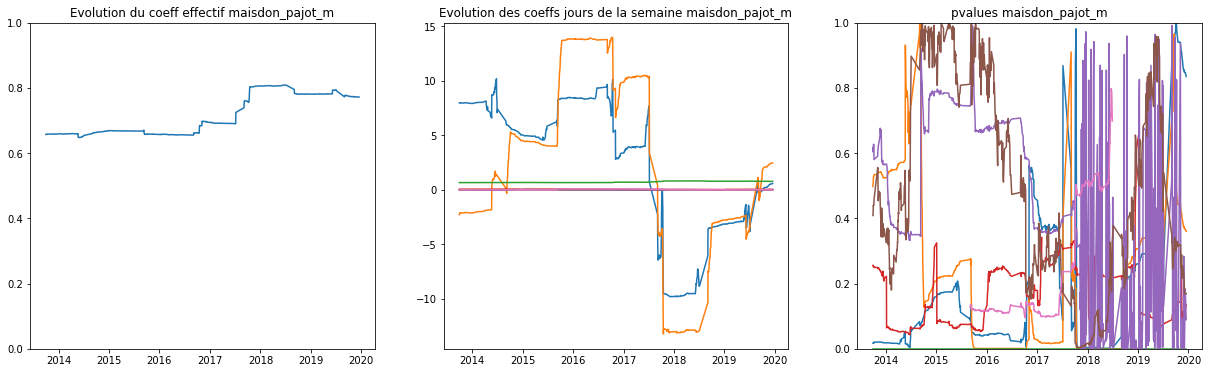

etab port_boyer_m_e


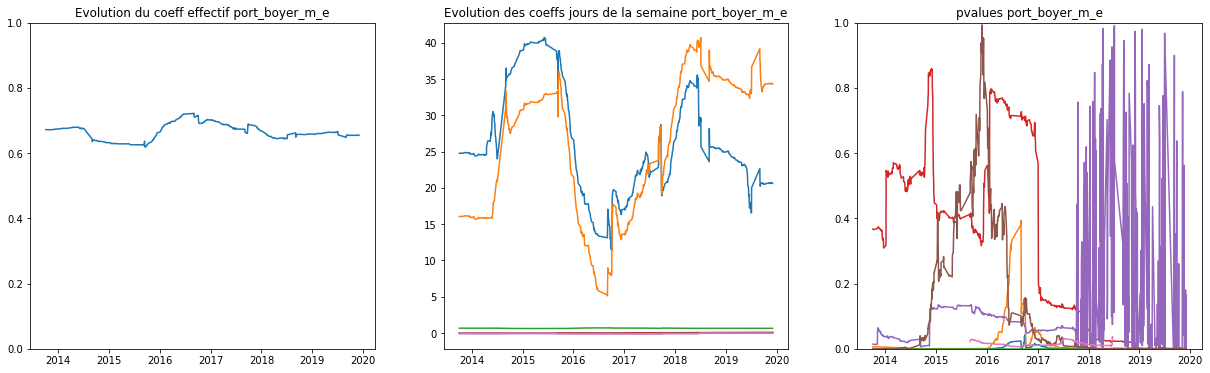

etab emile_pehant_m_e


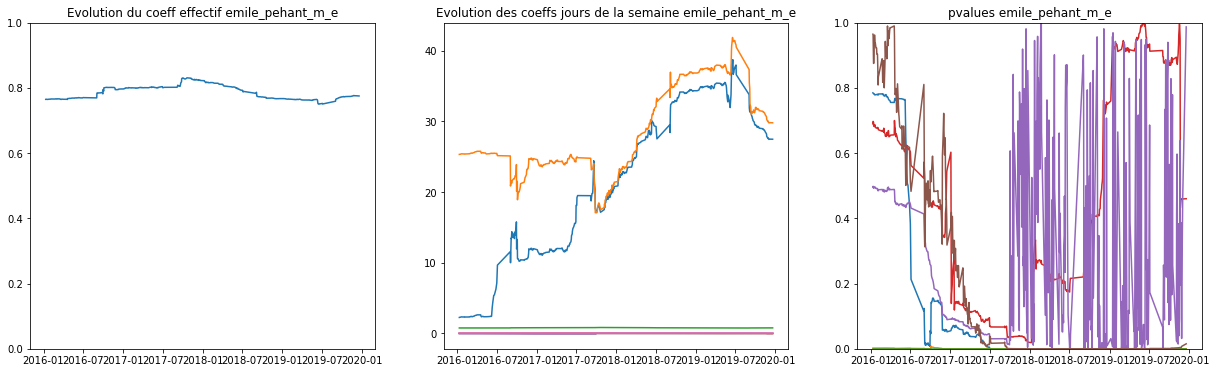

etab plantes_m_e


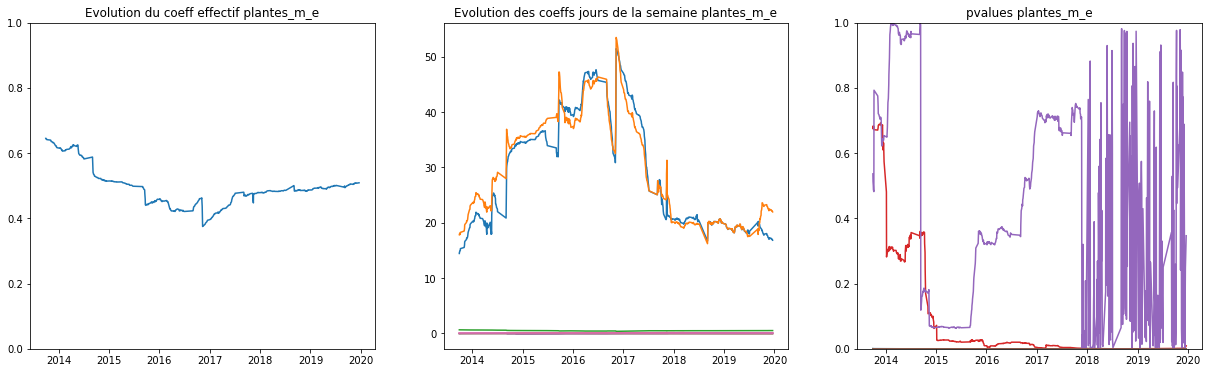

etab louis_guiotton_m


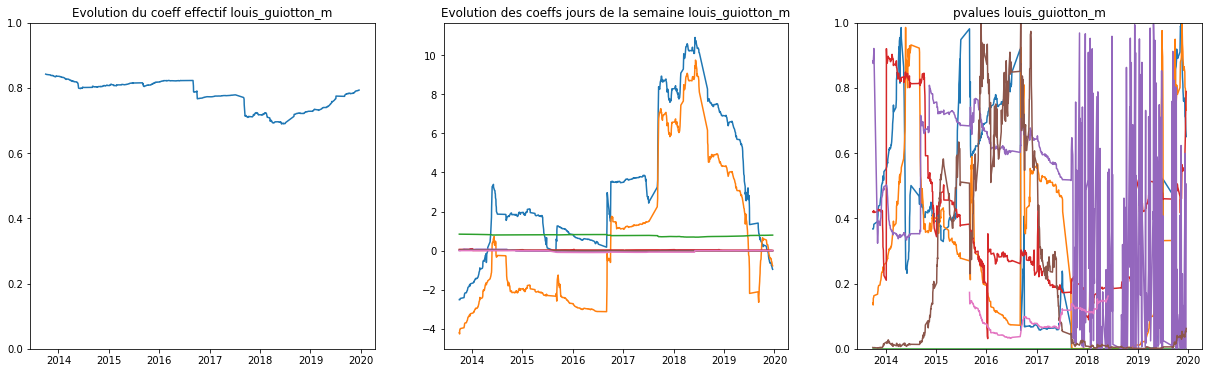

etab stalingrad_e


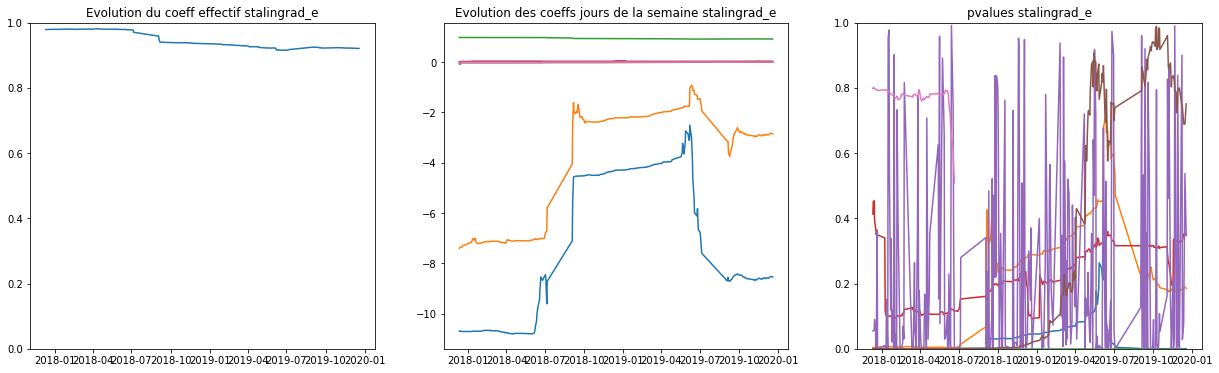

etab joneliere_m_e


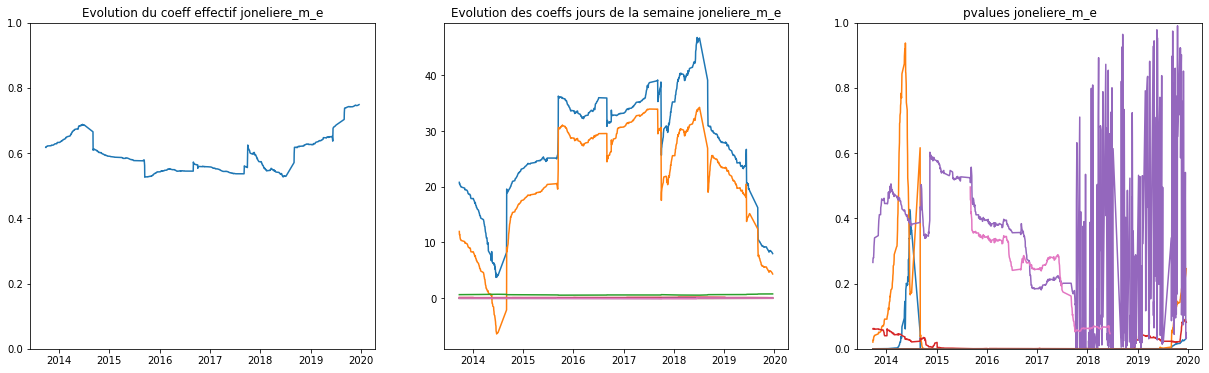

etab louise_michel_m_e


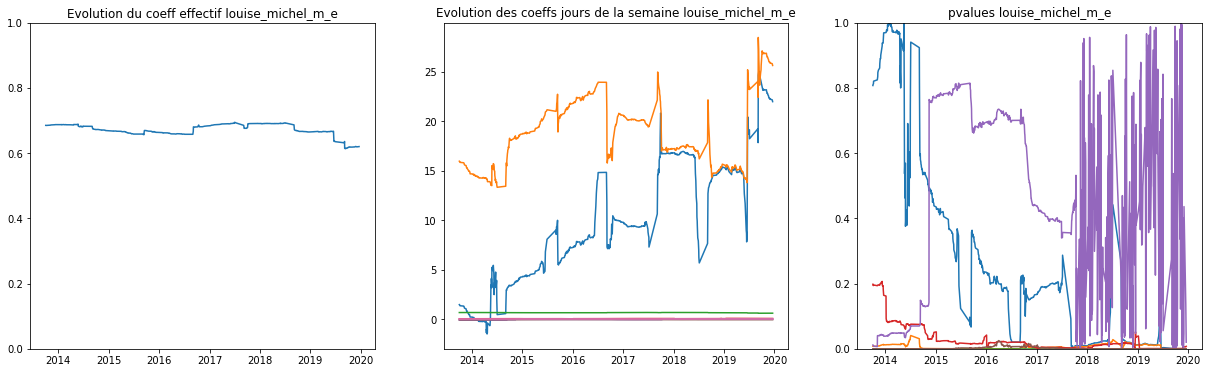

etab moliere_m


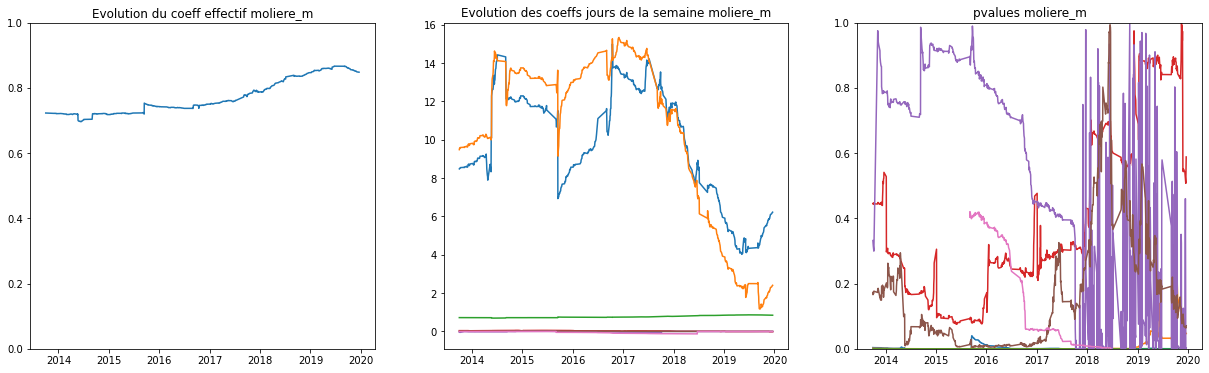

etab jean_jaures_e


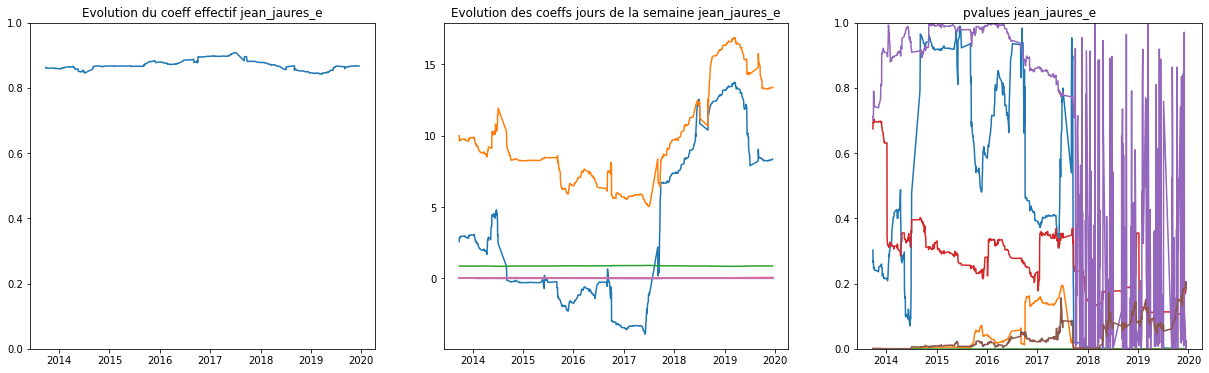

etab marsauderies_m


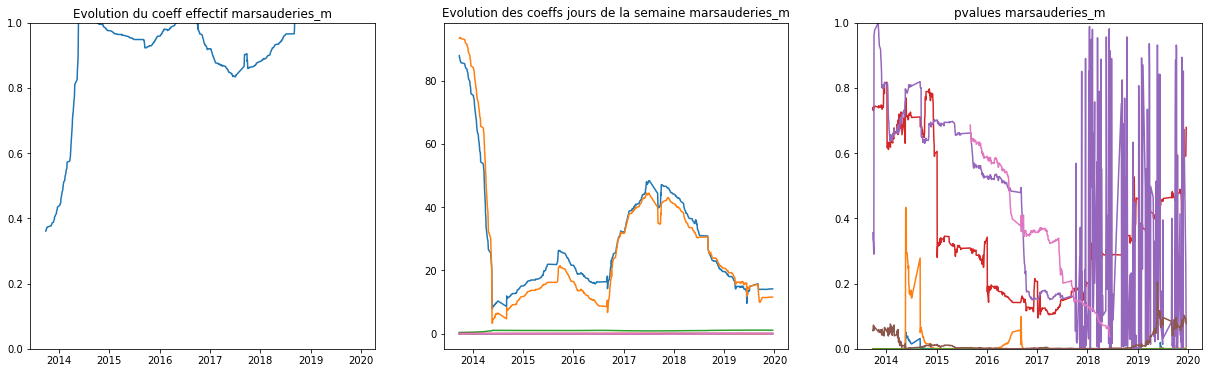

etab sully_m_e


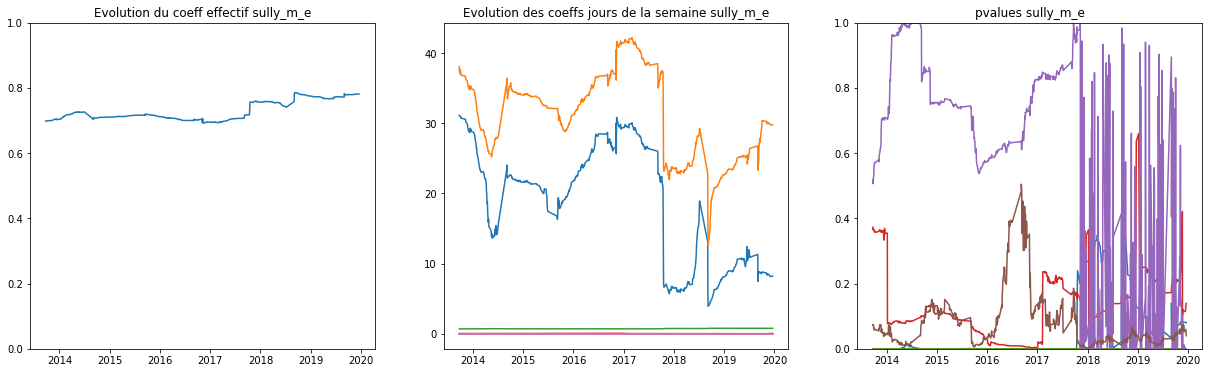

etab ledru_rollin_sarah_bernhardt_m_e


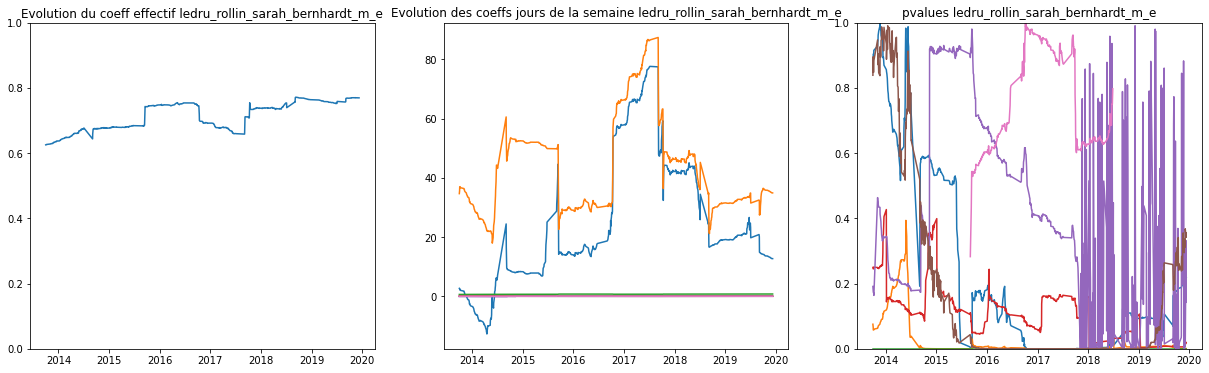

etab barberie_m_e


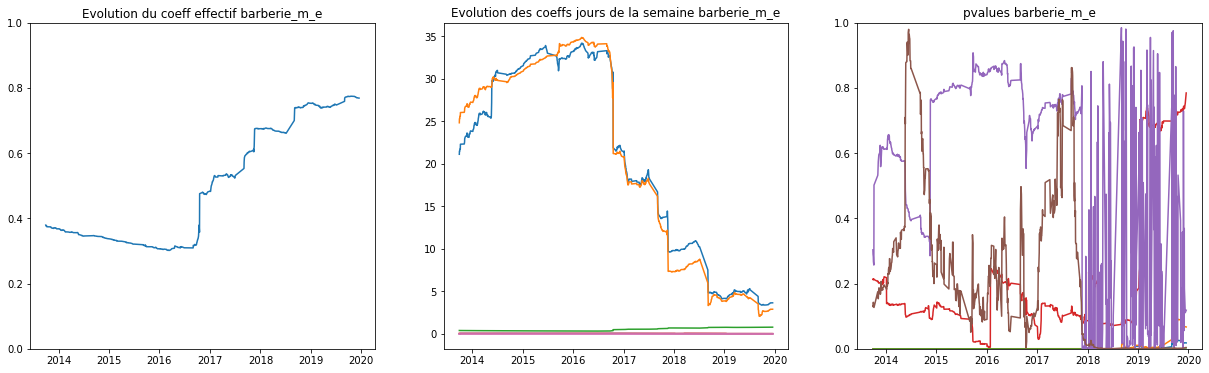

etab alphonse_braud_m_e


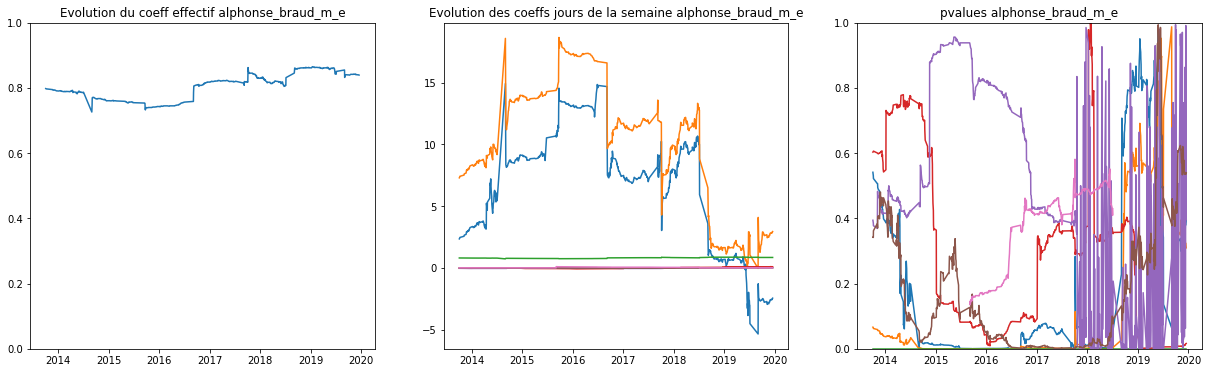

etab jean_moulin_m_e


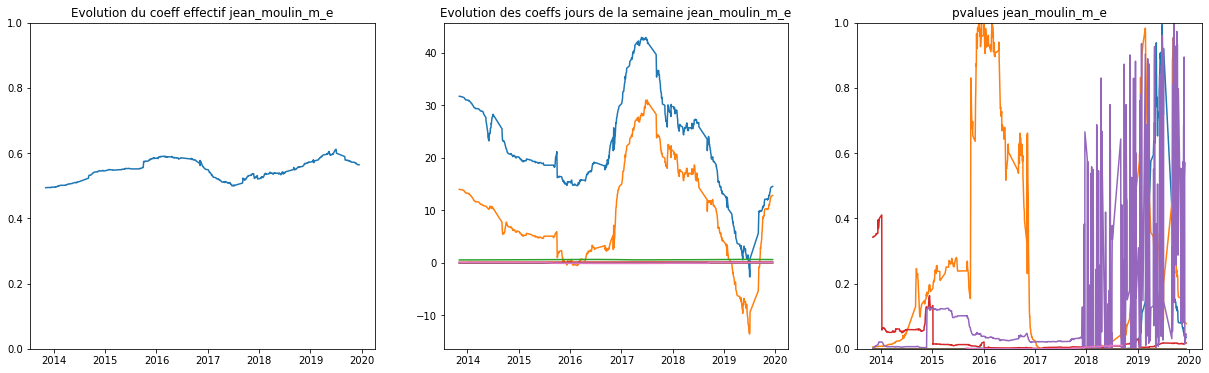

etab alain_fournier_e


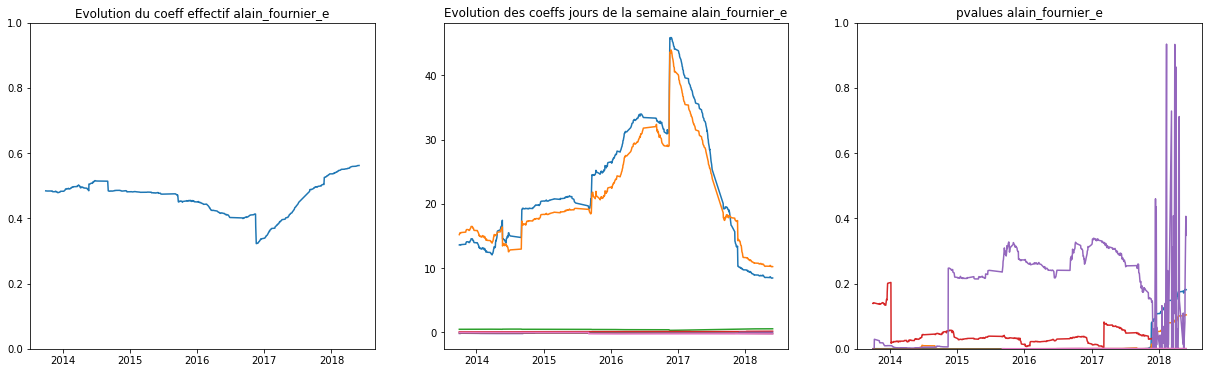

etab joseph_blanchart_m


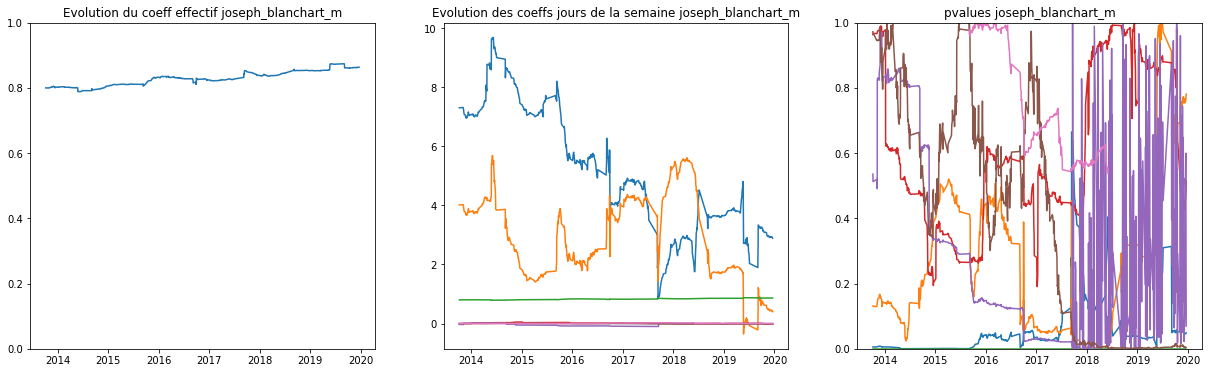

etab paul_gauguin_m_e


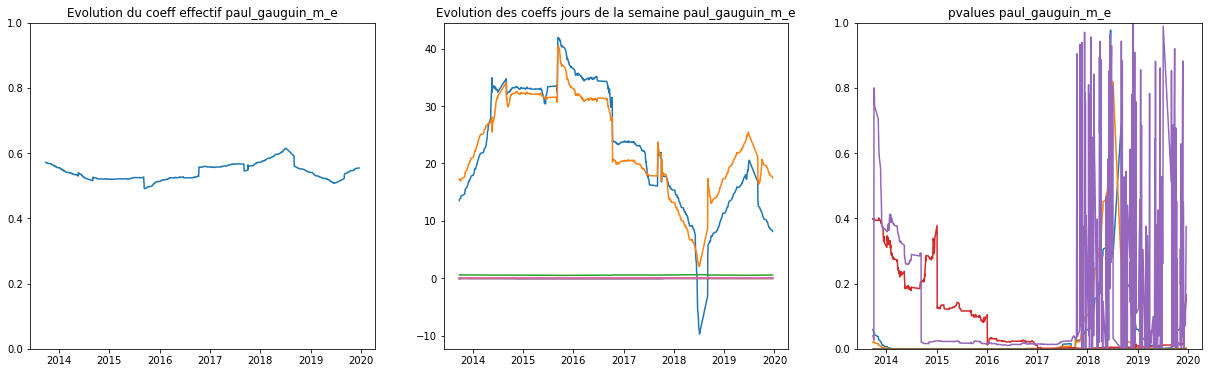

etab harouys_m_e


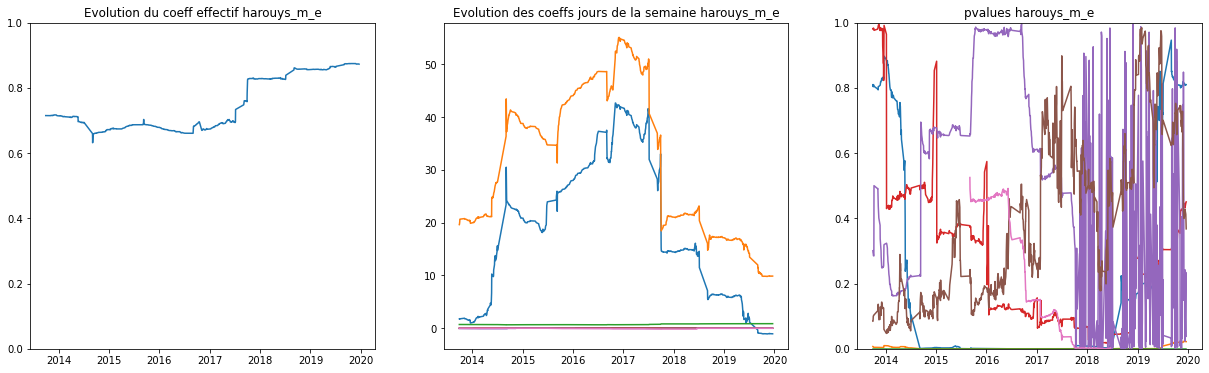

etab francois_dallet_docteur_teillais_m_e


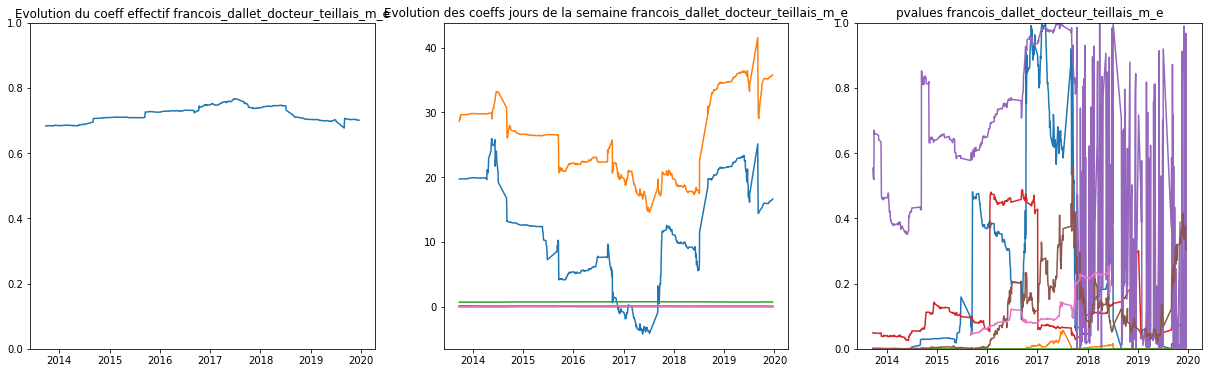

etab fredureau_m


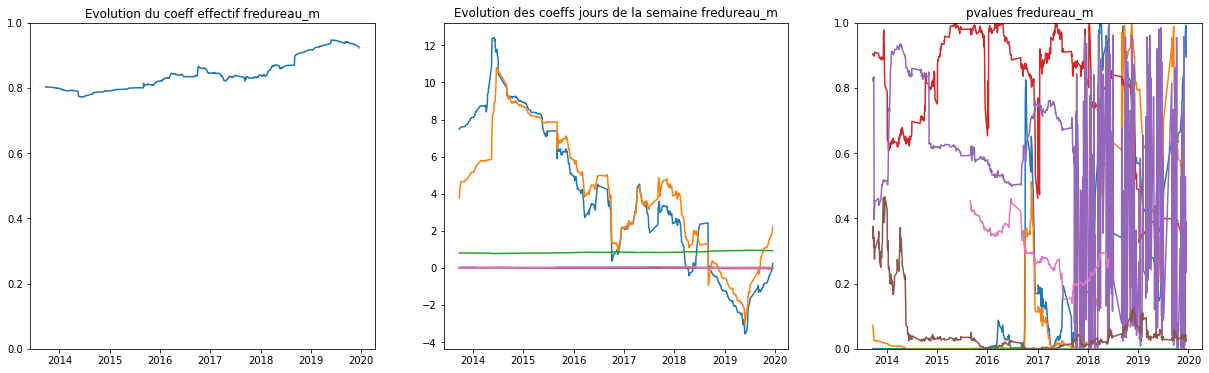

etab grand_carcouet_m_e


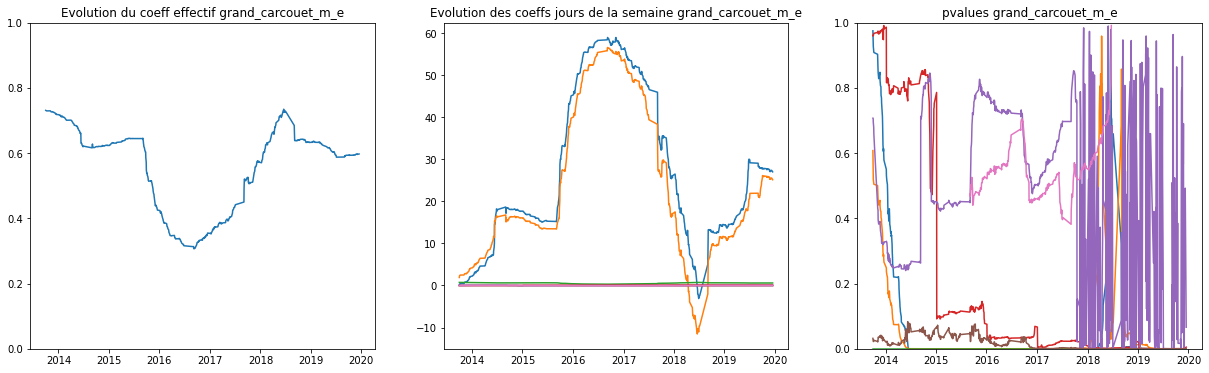

etab louis_pergaud_m_e


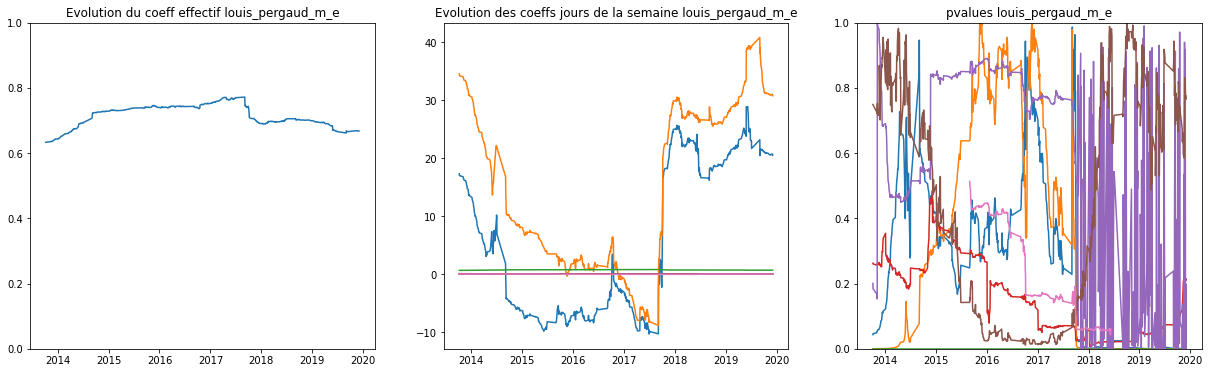

etab plessis_cellier_m_e


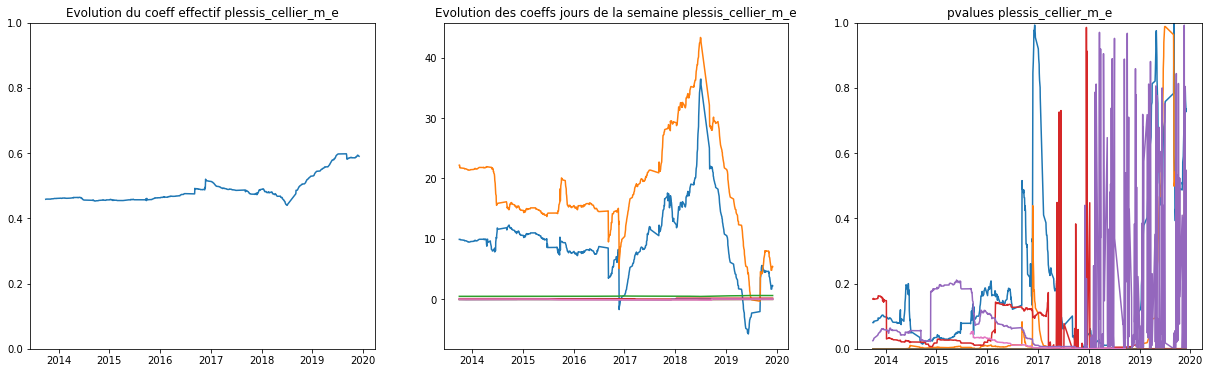

etab boccage_m


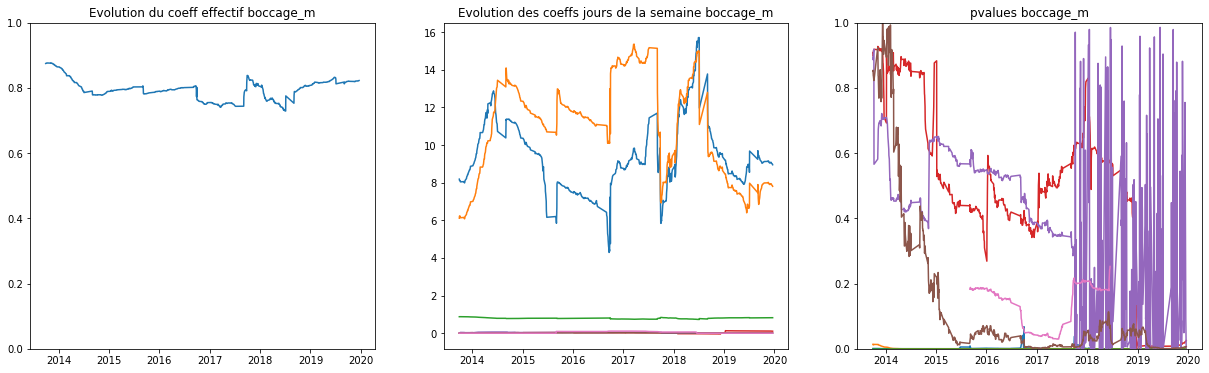

etab urbain_le_verrier_m_e


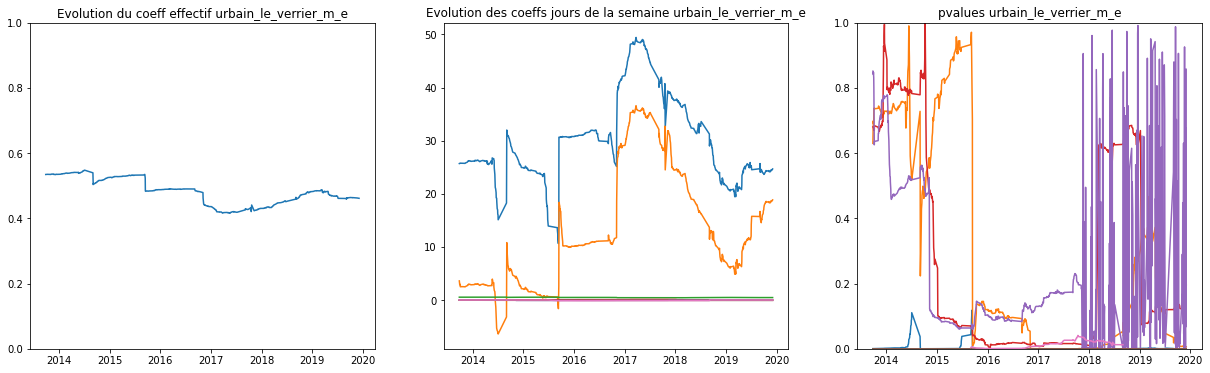

etab gustave_roch_e


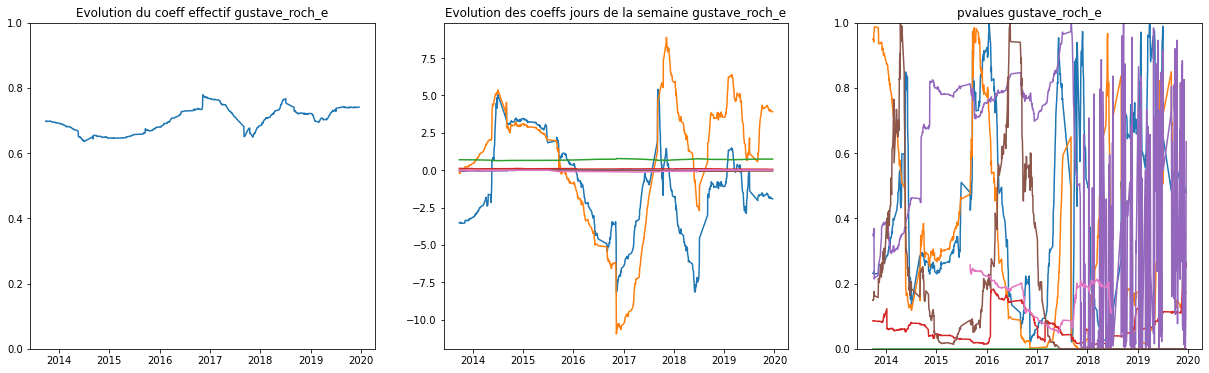

etab camille_claudel_m


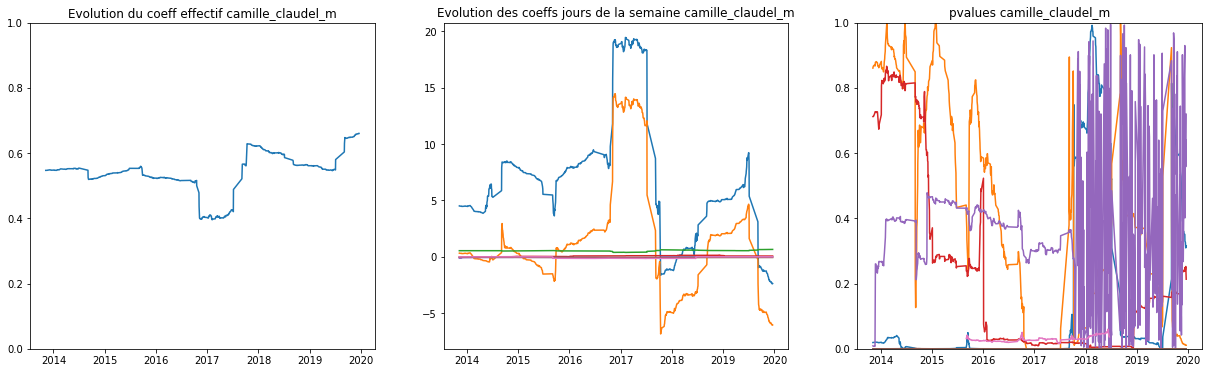

etab coudray_e


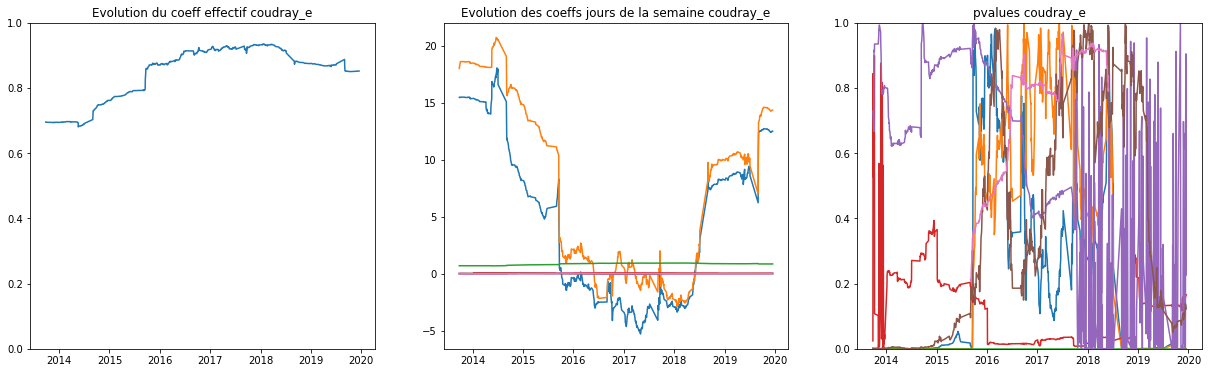

etab dervallieres_chezine_m_e


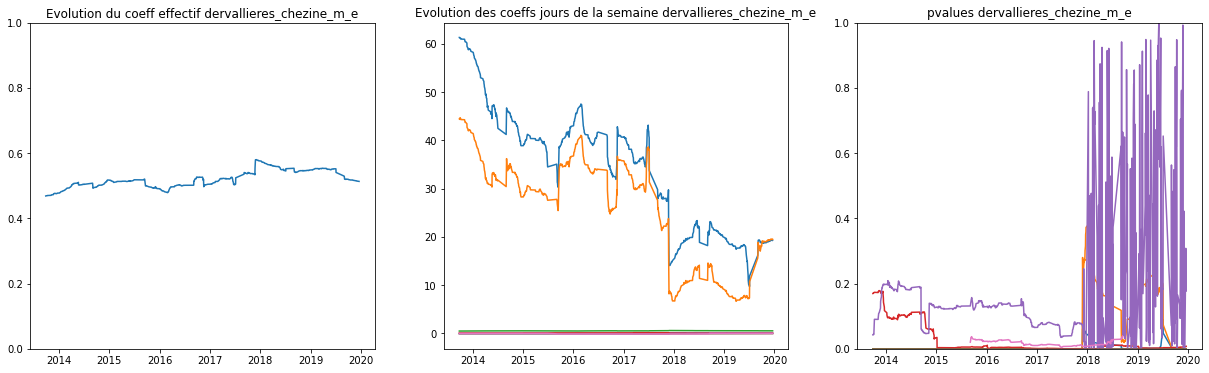

etab lucie_aubrac_m_e


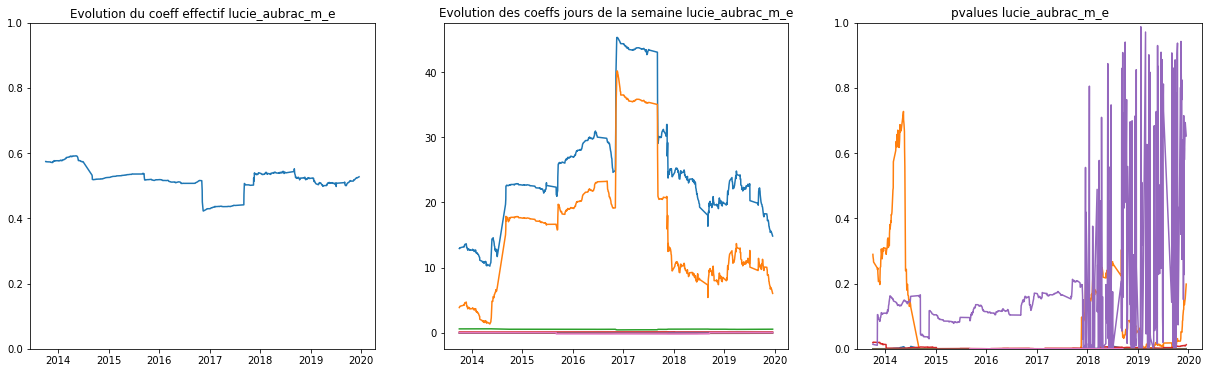

etab baut_m_e


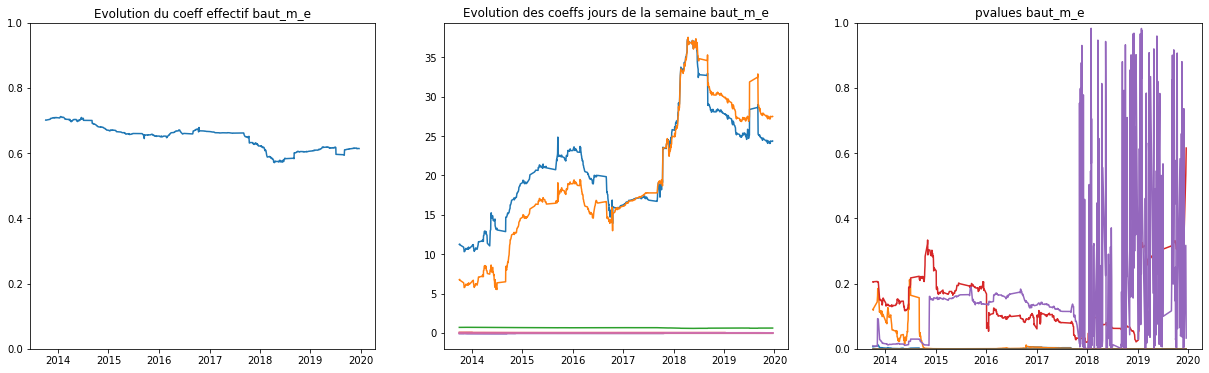

etab chataigniers_e


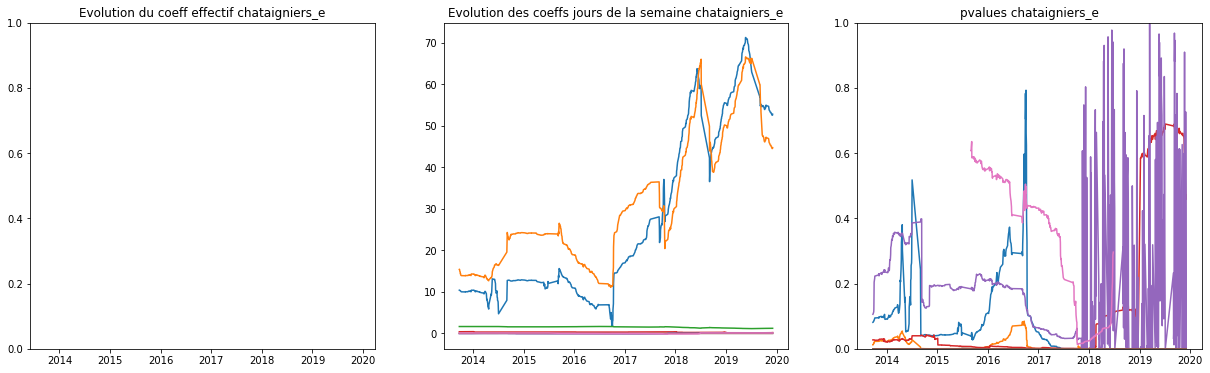

etab coudray_m


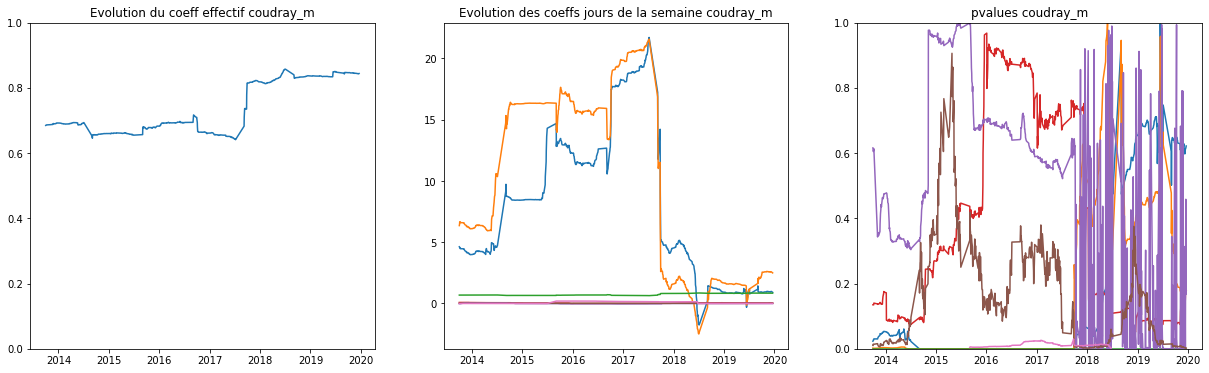

etab agenets_m_e


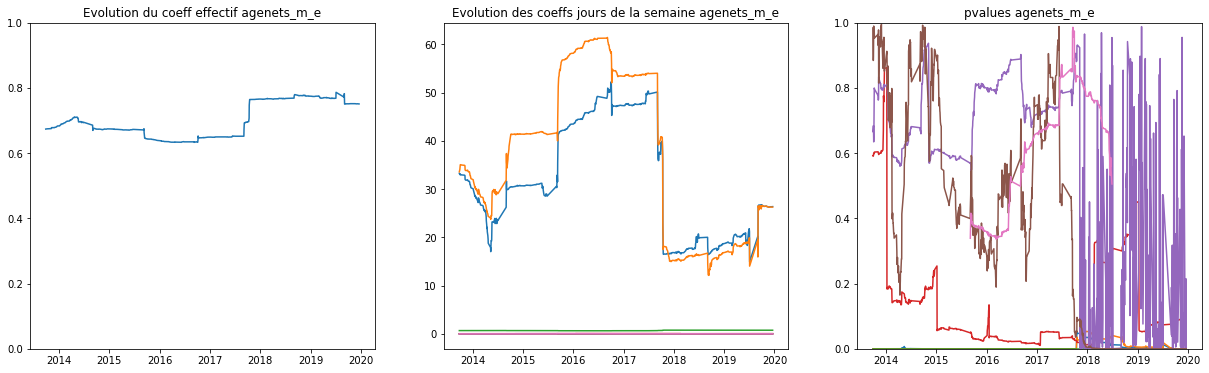

etab henri_bergson_m_e


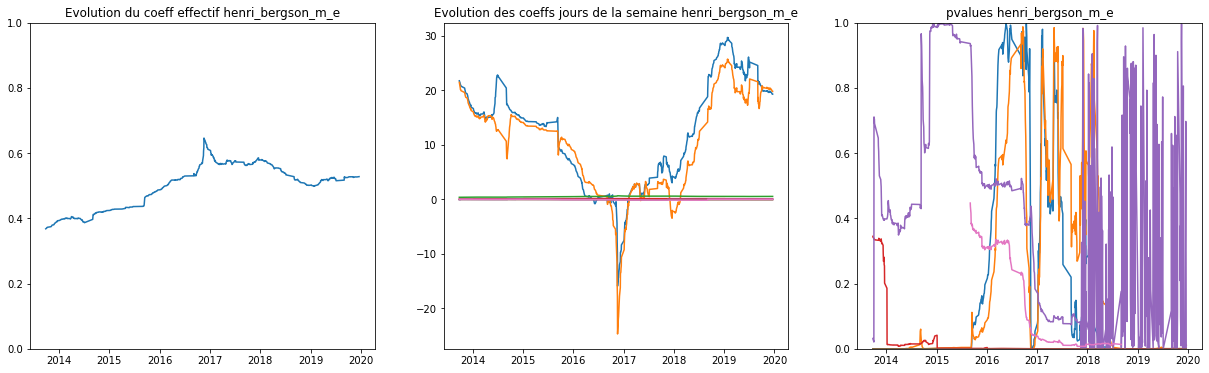

etab leon_say_m_e


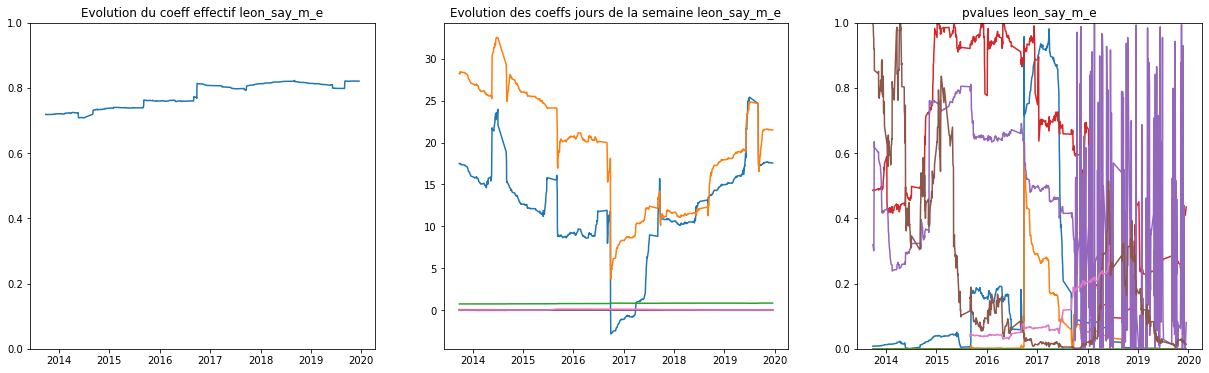

etab alain_fournier_m


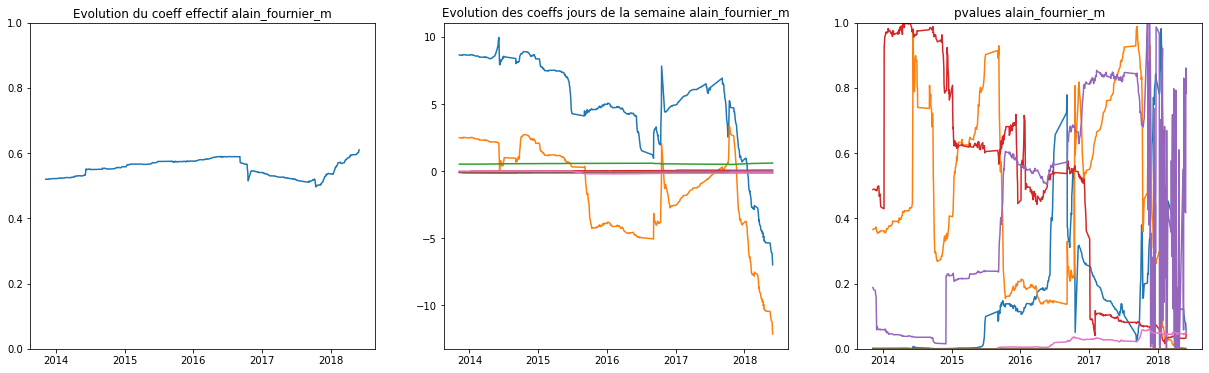

etab cote_d'or_m


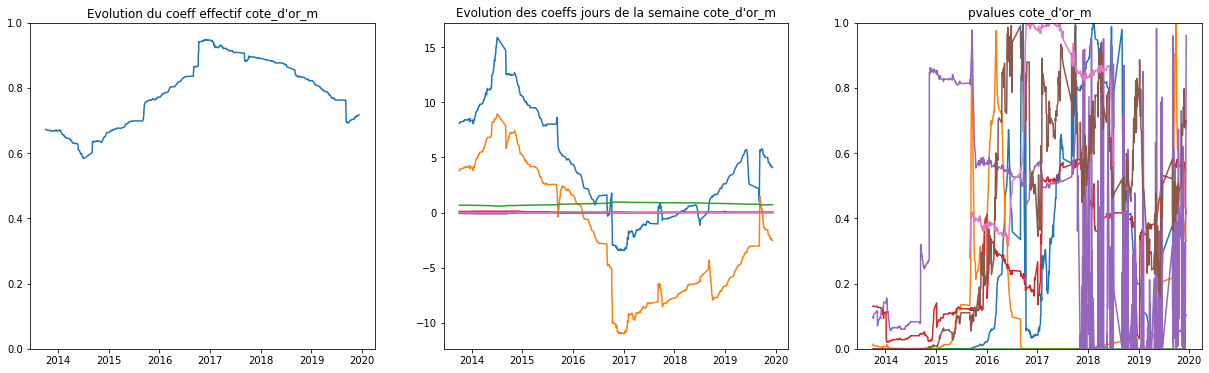

etab chauviniere_m


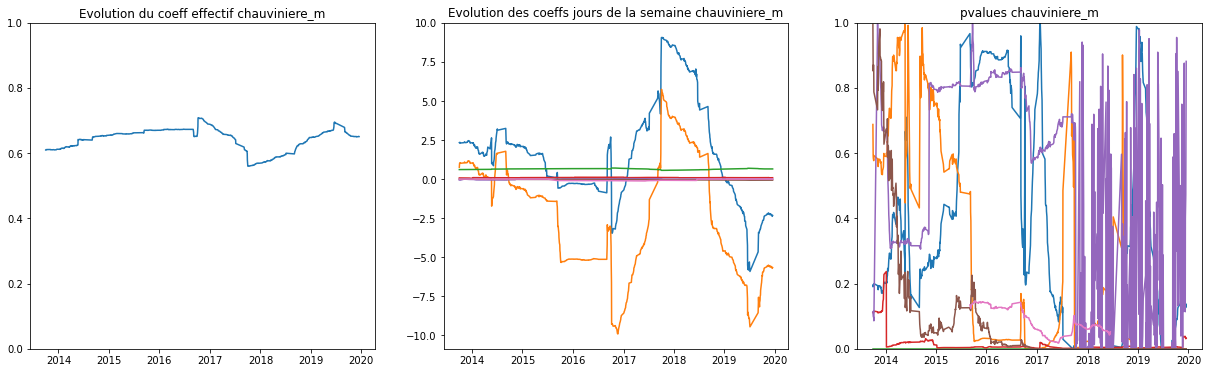

etab george_sand_e


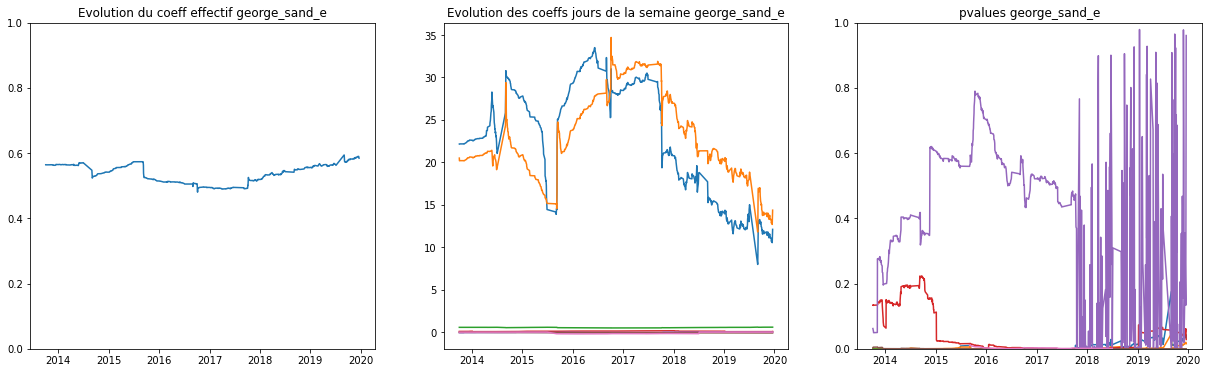

etab villa_maria_m_e


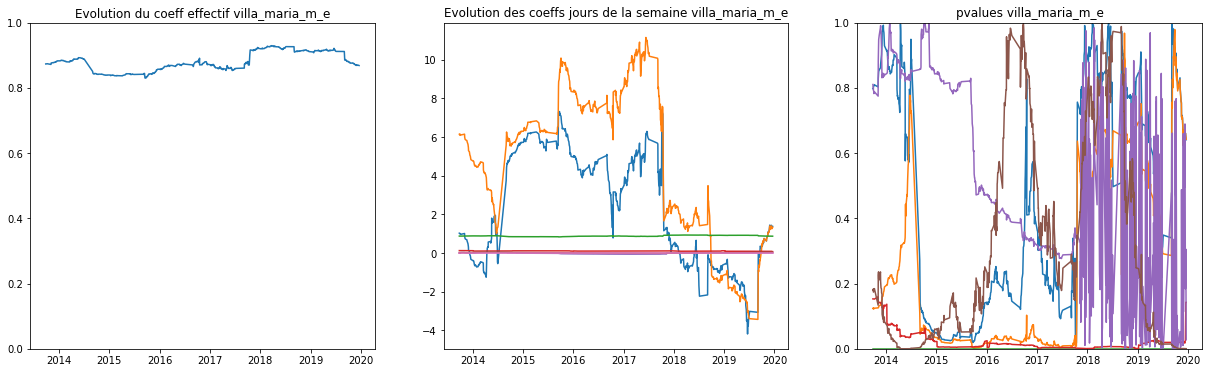

etab gaston_serpette_e


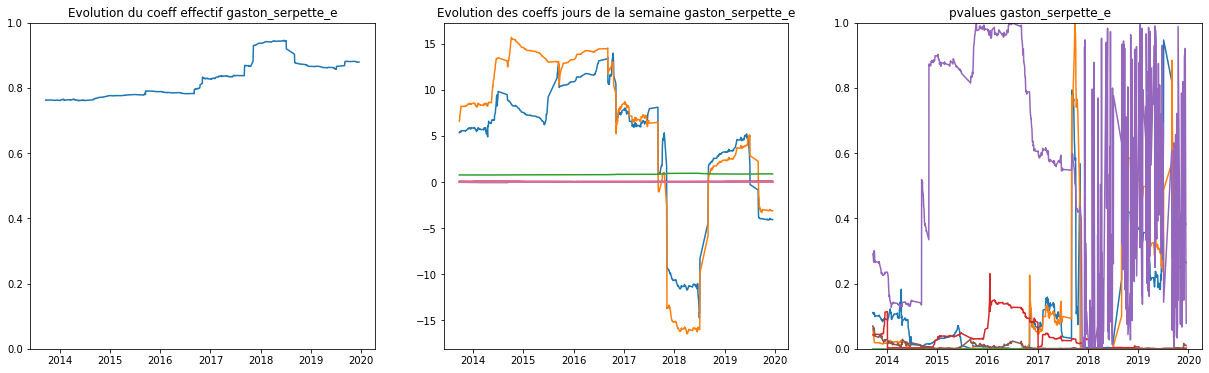

etab fraternite_e


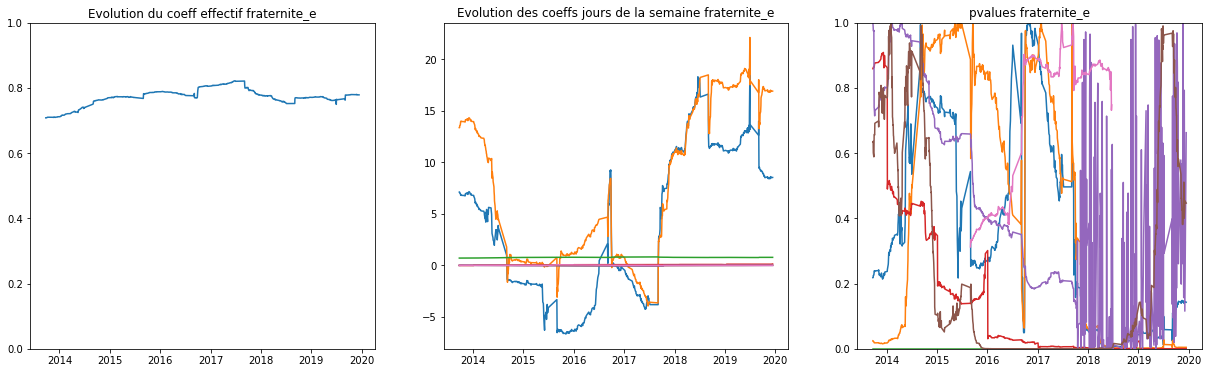

etab longchamp_m_e


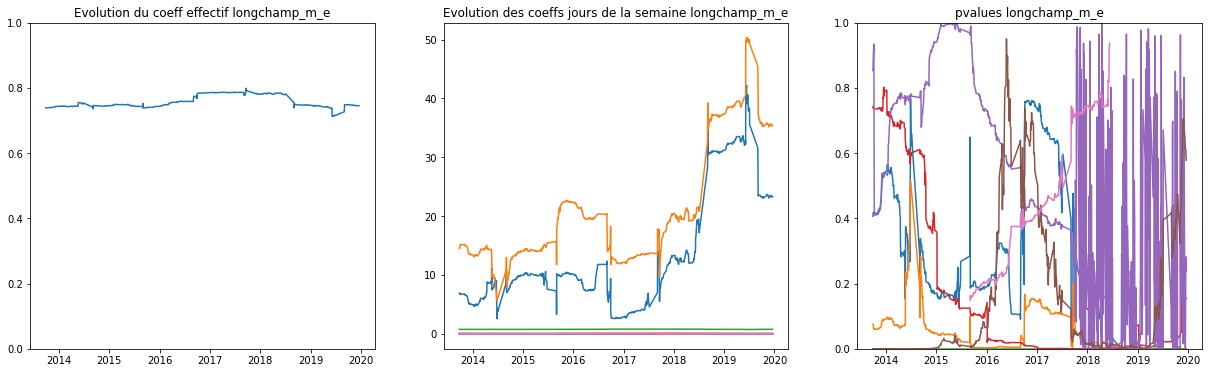

etab batignolles_m_e


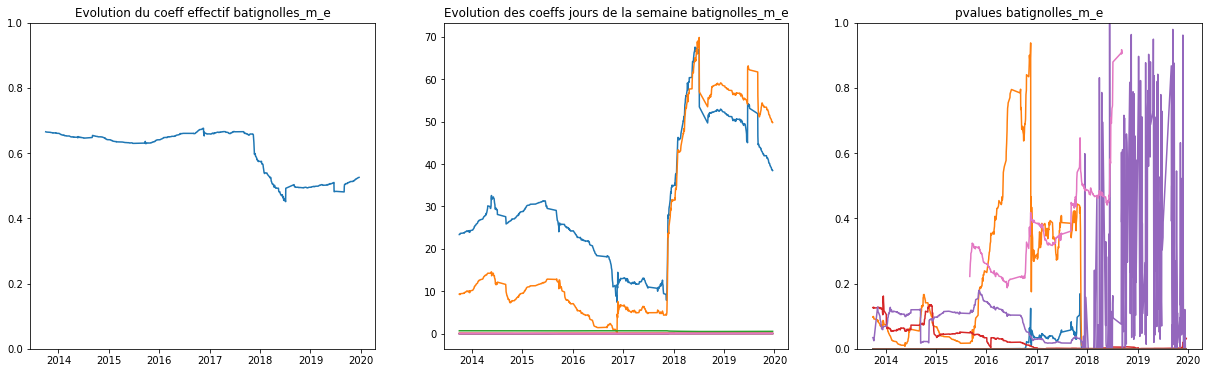

etab chene_d'aron_e


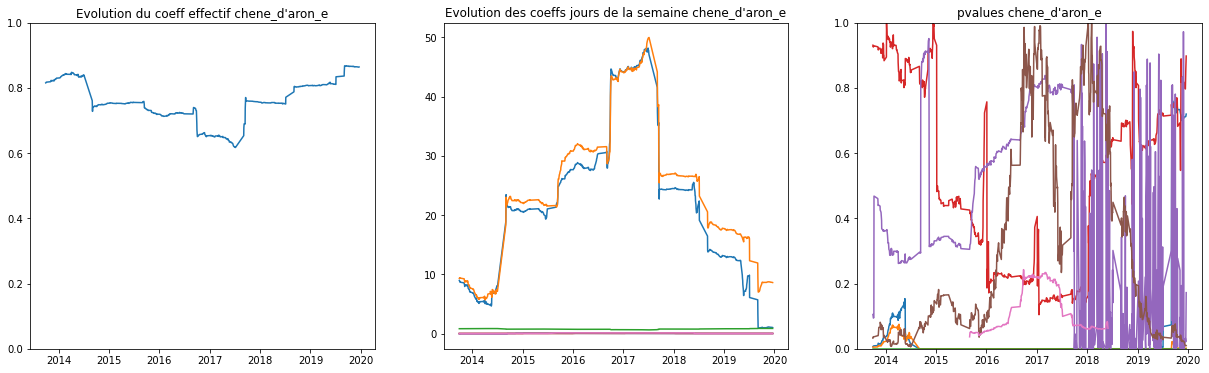

etab gaston_serpette_m


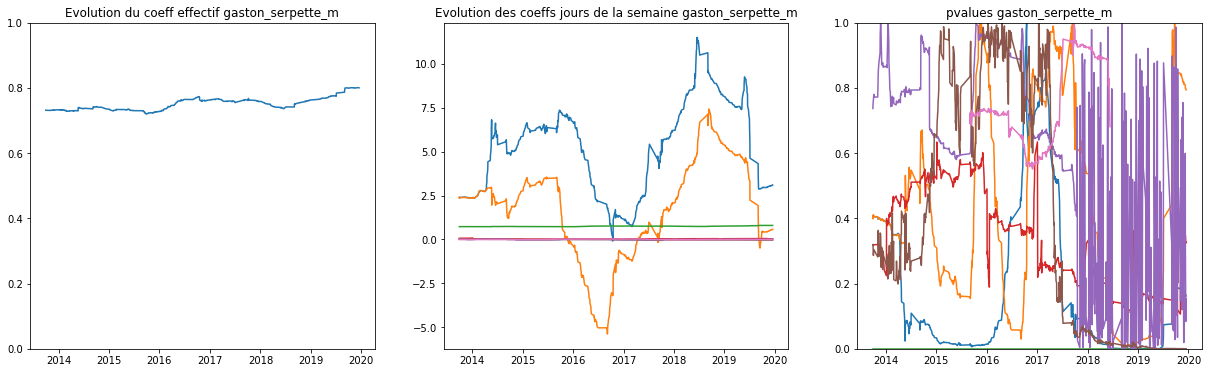

etab gay_lussac_m_e


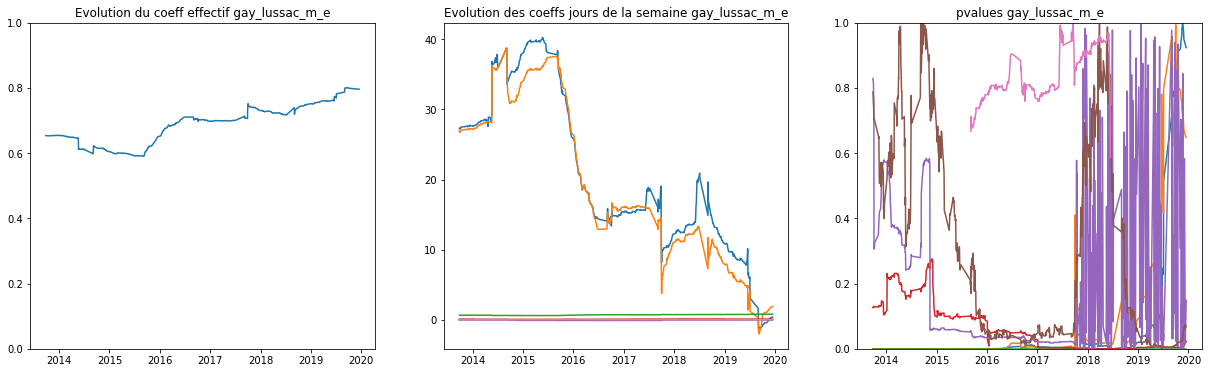

etab andre_lermite_lamoriciere_m_e


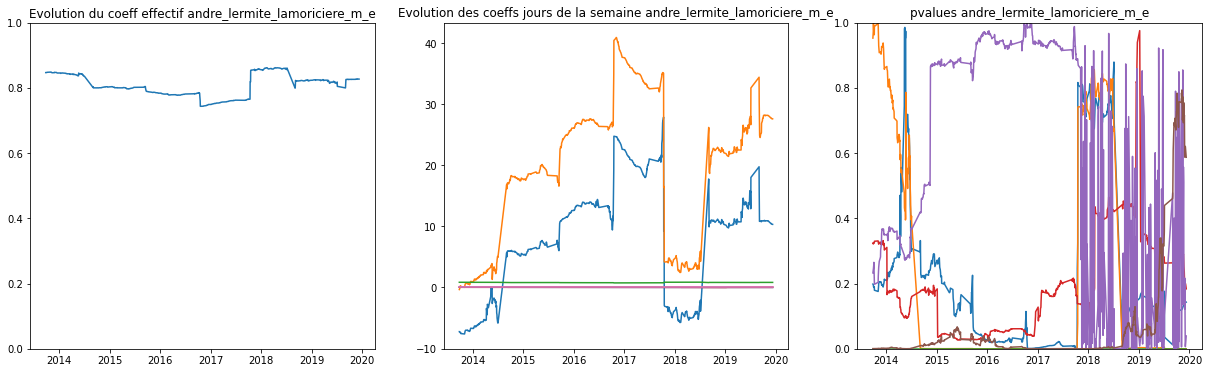

etab chauviniere_e


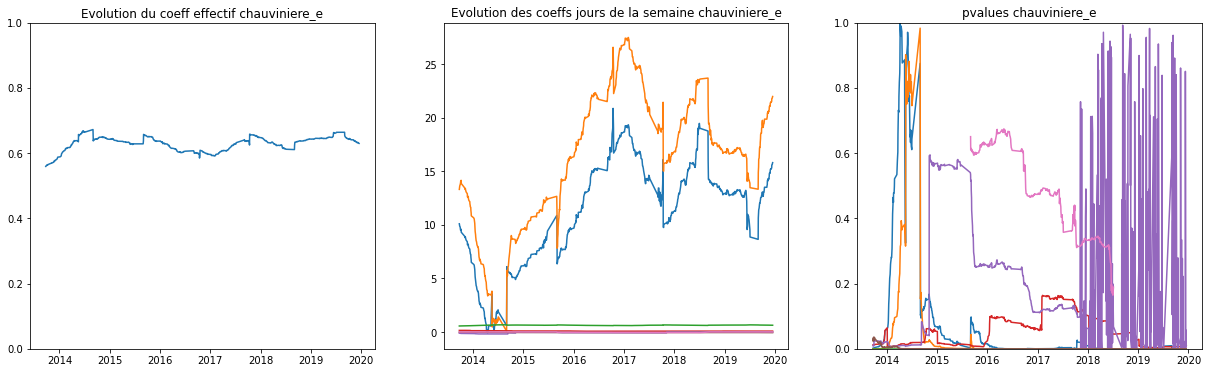

etab leon_blum_e


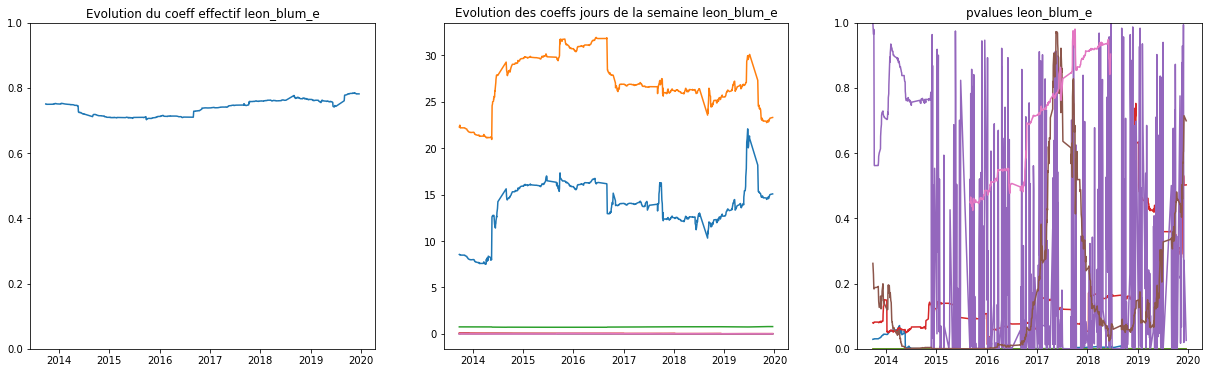

etab jean_zay_m


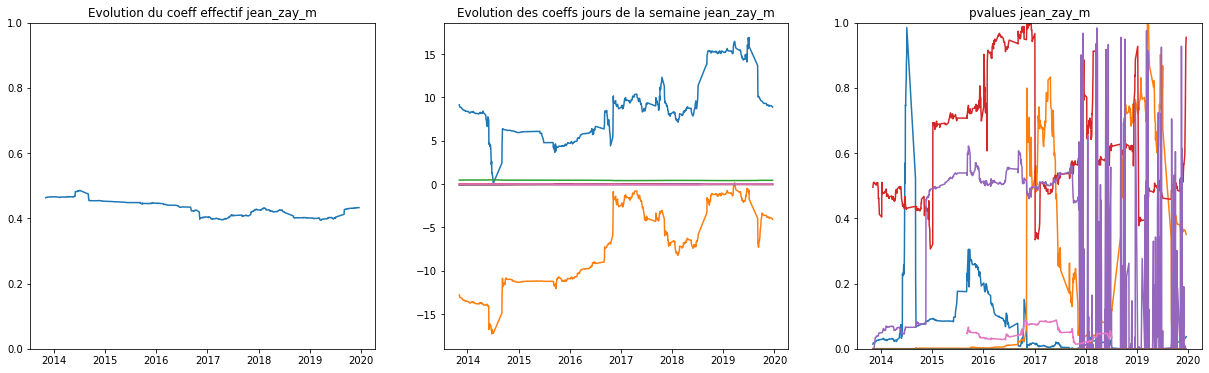

etab georges_lafont_m


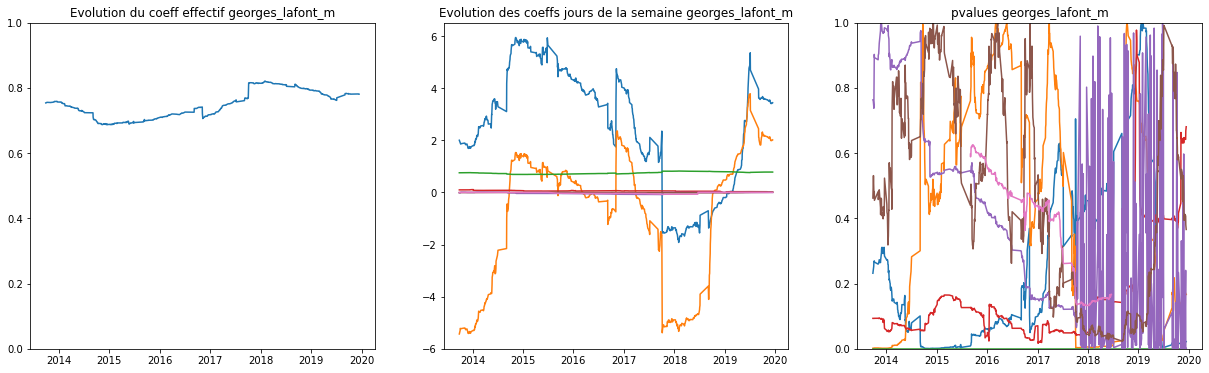

etab maison_neuve_m_e


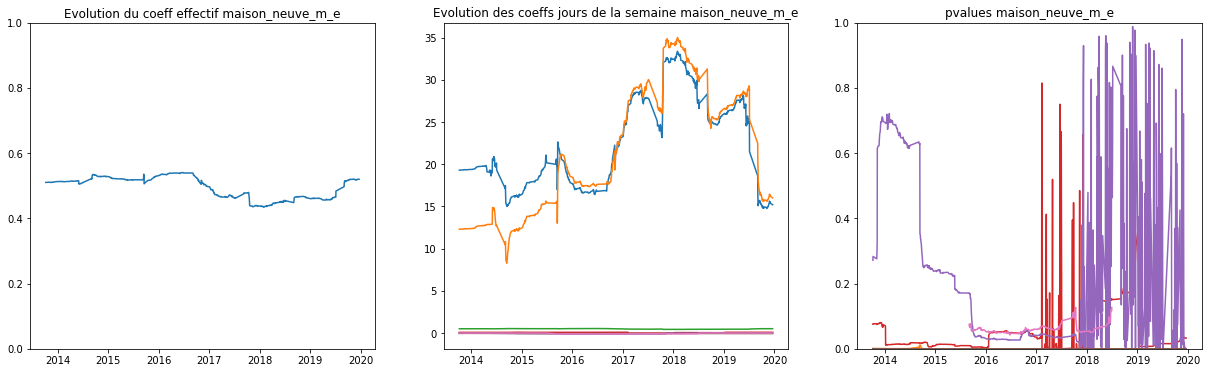

etab francoise_dolto_m_e


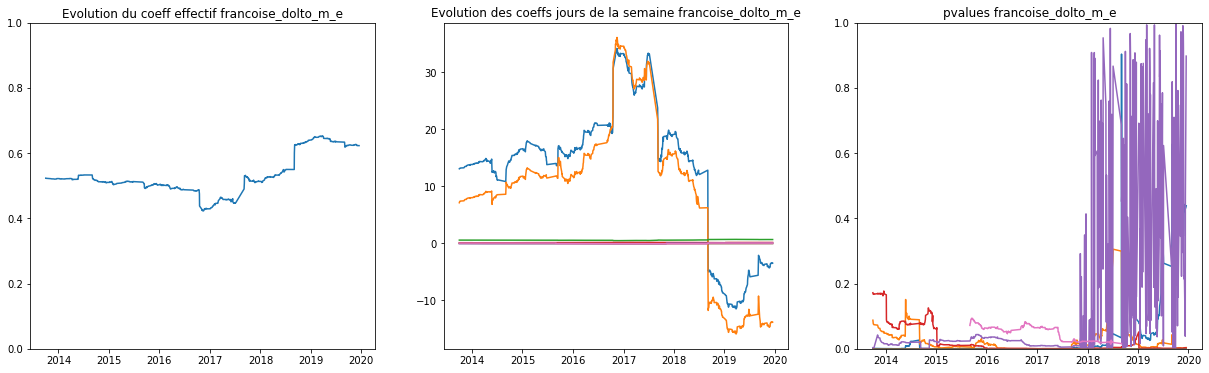

etab champenois_e


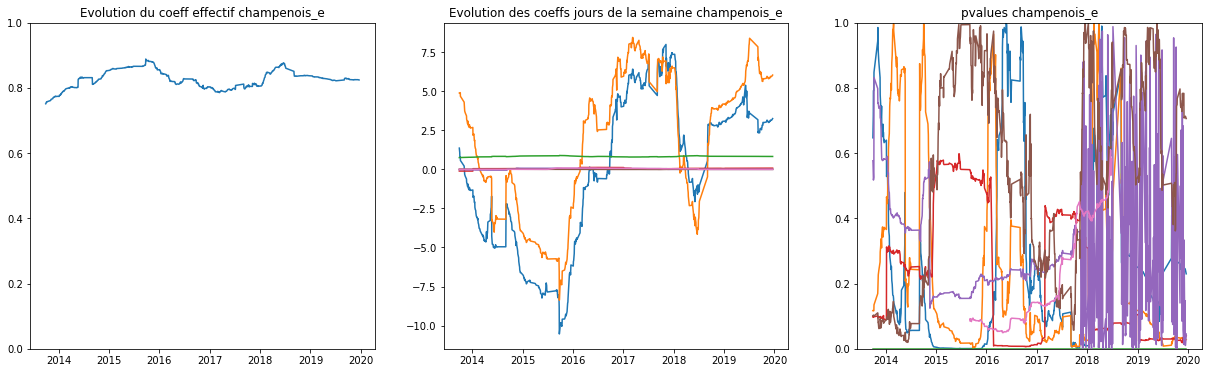

etab rue_noire_m_e


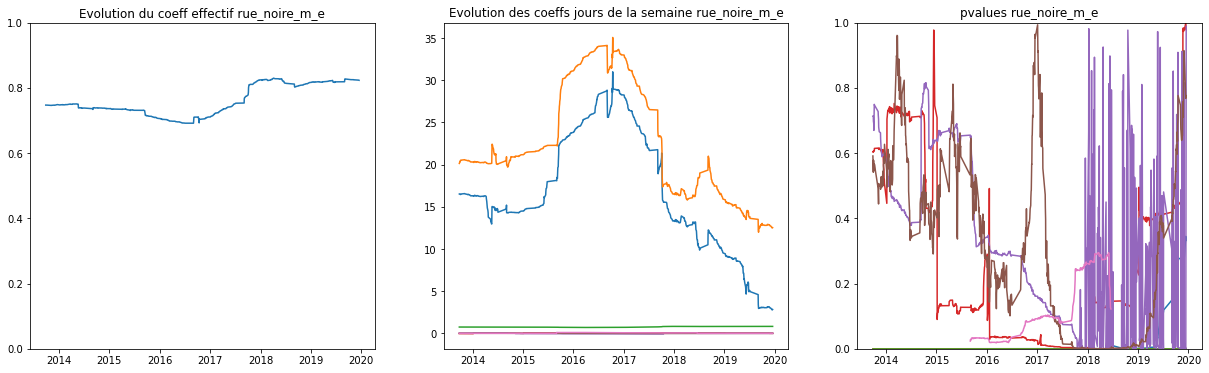

etab fonteny_m


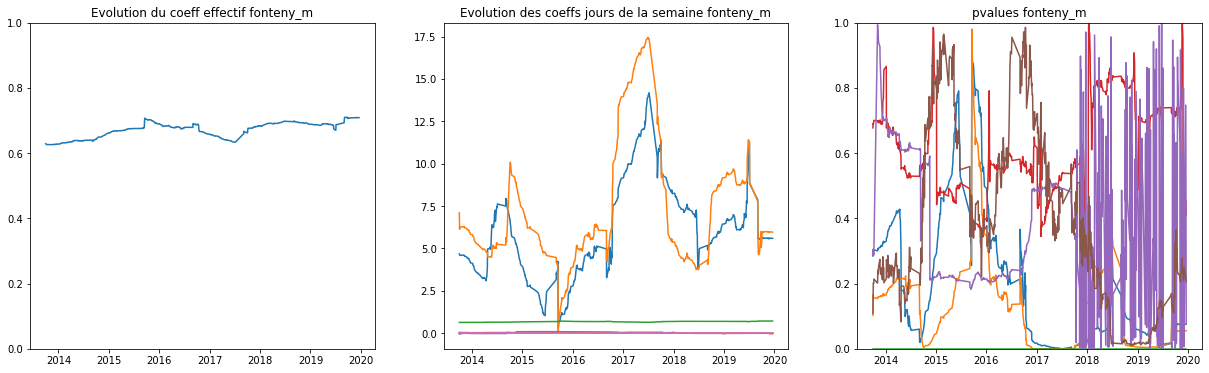

etab chataigniers_m


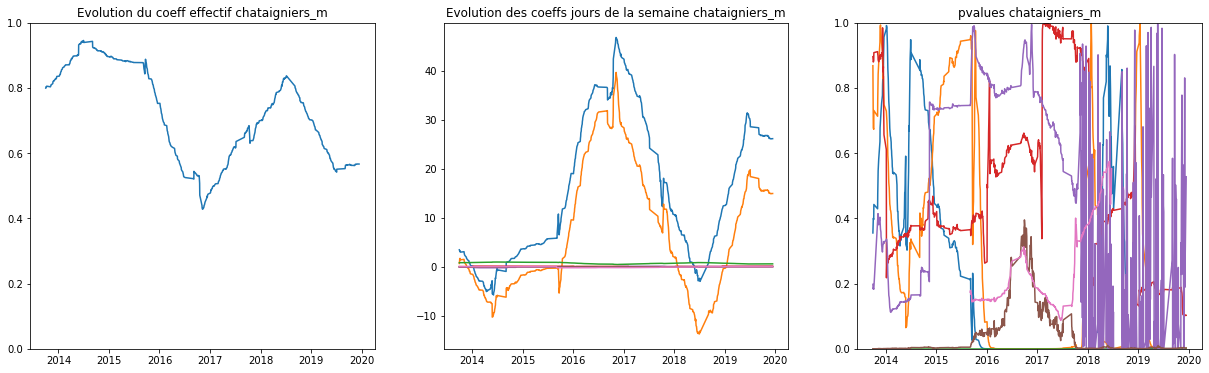

etab anatole_de_monzie_e


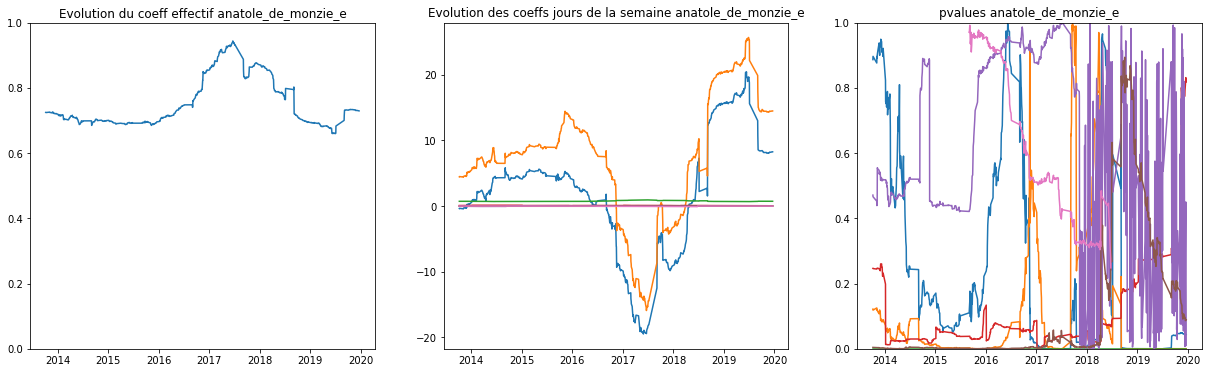

etab fellonneau_m_e


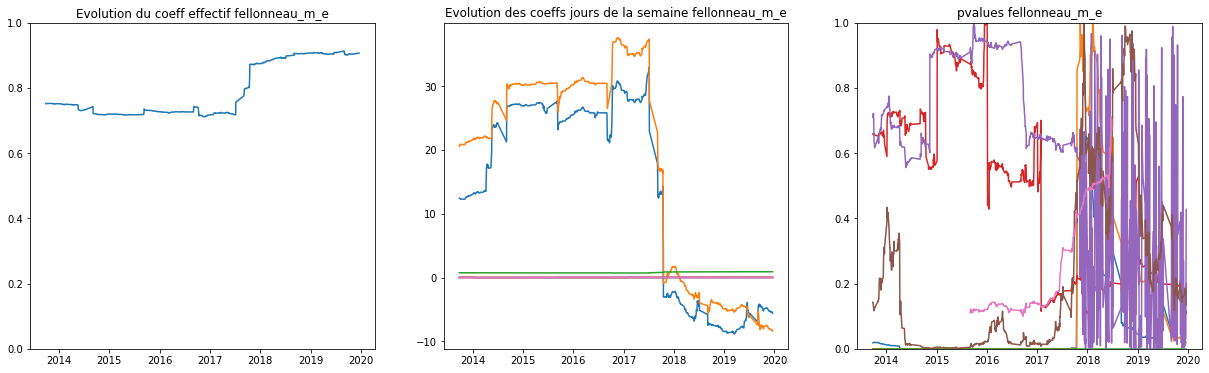

In [26]:
for etab in liste_etab:
    print("etab", etab)
    rolling_params = dic[etab]["params"]
    rolling_pvalues = dic[etab]["pval"]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (21, 6))

    ax1.plot(rolling_params.effectif)
    ax1.set_title("Evolution du coeff effectif "+ etab)
    ax1.set_ylim(0, 1)


    ax2.plot(rolling_params[['Juin', 'Septembre', 'effectif', 'repas_noel','Lundi_avec_poisson', 'Mardi_sans_poisson', 'Jeudi_avec_poisson']])
    ax2.set_title("Evolution des coeffs jours de la semaine "+ etab)
   

    #ax3.plot(rolling_params.rsquared)
    #ax3.set_title("Evolution du r carré " + quartier)
 
    
    ax3.plot(rolling_pvalues[['Juin', 'Septembre', 'effectif', 'repas_noel','Lundi_avec_poisson', 'Mardi_sans_poisson', 'Jeudi_avec_poisson']])
    ax3.set_title("pvalues " + etab)
    ax3.set_ylim([0,1])
    

    plt.show()

In [27]:
dic_seuil = {}
for s in [0.1, 0.2, 0.3, 0.4, 0.5]:
    dic_seuil[s] = {}
    for etab in liste_etab:
        dic_seuil[s][etab] = sum(dic[etab]["pval"][['Juin', 'Septembre', 'effectif', 'repas_noel','Lundi_avec_poisson', 'Mardi_sans_poisson', 'Jeudi_avec_poisson']].max(axis= 1)<s) / len(dic[etab]["pval"])



In [30]:
#dic_seuil[0.2]

In [31]:
sum(dic_seuil[0.2][etab]>0.90 for etab in liste_etab)

0

# 3. Etude du gaspillage sur l'ensemble des établissments

In [32]:
data[data["annee_scolaire"]=="2019-2020"].nom_etab.unique()
print("Nb d'etablissement en 2019-2020:", len(data[data["annee_scolaire"]=="2019-2020"].nom_etab.unique()))

Nb d'etablissement en 2019-2020: 87


In [33]:
print(data[data["annee_scolaire"]=="2019-2020"].nom_etab.unique()[:4])

['coudray_m' 'coudray_e' 'marsauderies_m' 'batignolles_m_e']


In [36]:
dic_res = {}
for etab in data[data["annee_scolaire"]=="2019-2020"].nom_etab.unique():
    print("etab", etab)
    dic_res[etab] = pd.read_pickle(f"../results/general/x_pred_{etab}_1.64_0.9.pk")
    print("valeurs nulles", dic_res[etab].isnull().sum().sum())
    print("------------------------------------------------")
    print("gaspillage réel",dic_res[etab].gaspillage.mean())
    print("gaspillage pred",dic_res[etab].gaspi_pred_upper.mean())
    print("------------------------------------------------")
    print(len(dic_res[etab][dic_res[etab].gaspillage<0]), "jours réels avec un manque de repas")
    print(len(dic_res[etab][dic_res[etab].gaspi_pred_upper<0]), "jours estimés avec un manque de repas")
    print("-----------------------------------------------------")
    print("-----------------------------------------------------")




etab coudray_m
valeurs nulles 0
------------------------------------------------
gaspillage réel 0.03324079534704721
gaspillage pred 0.05579676838319453
------------------------------------------------
27 jours réels avec un manque de repas
18 jours estimés avec un manque de repas
-----------------------------------------------------
-----------------------------------------------------
etab coudray_e
valeurs nulles 0
------------------------------------------------
gaspillage réel 0.059685437193002504
gaspillage pred 0.06101330475013535
------------------------------------------------
19 jours réels avec un manque de repas
22 jours estimés avec un manque de repas
-----------------------------------------------------
-----------------------------------------------------
etab marsauderies_m
valeurs nulles 0
------------------------------------------------
gaspillage réel 0.09102906567253331
gaspillage pred 0.09462270471594564
------------------------------------------------
20 jours rée

valeurs nulles 0
------------------------------------------------
gaspillage réel 0.09338195528698613
gaspillage pred 0.24209341692449896
------------------------------------------------
43 jours réels avec un manque de repas
0 jours estimés avec un manque de repas
-----------------------------------------------------
-----------------------------------------------------
etab villa_maria_m_e
valeurs nulles 0
------------------------------------------------
gaspillage réel 0.07586437670392825
gaspillage pred 0.13910514693499418
------------------------------------------------
24 jours réels avec un manque de repas
1 jours estimés avec un manque de repas
-----------------------------------------------------
-----------------------------------------------------
etab georges_lafont_m
valeurs nulles 0
------------------------------------------------
gaspillage réel -inf
gaspillage pred 0.00022355821941626337
------------------------------------------------
43 jours réels avec un manque de r

valeurs nulles 0
------------------------------------------------
gaspillage réel 0.09292987918375904
gaspillage pred 0.1608370360343879
------------------------------------------------
5 jours réels avec un manque de repas
0 jours estimés avec un manque de repas
-----------------------------------------------------
-----------------------------------------------------
etab plessis_cellier_m_e
valeurs nulles 0
------------------------------------------------
gaspillage réel 0.08113554711831324
gaspillage pred 0.014869662326970207
------------------------------------------------
38 jours réels avec un manque de repas
72 jours estimés avec un manque de repas
-----------------------------------------------------
-----------------------------------------------------
etab alain_fournier_m_e
valeurs nulles 0
------------------------------------------------
gaspillage réel 0.1880683899056647
gaspillage pred -0.8483841757802041
------------------------------------------------
6 jours réels ave

9 jours réels avec un manque de repas
1 jours estimés avec un manque de repas
-----------------------------------------------------
-----------------------------------------------------


In [40]:
liste_etab = data[data["annee_scolaire"]=="2019-2020"].nom_etab.unique()

df_res = pd.DataFrame(liste_etab, columns = ["etab"])
df_res["gaspillage_reel"] = [dic_res[etab].gaspillage.mean() for etab in liste_etab]
df_res["gaspillage_pred"] = [dic_res[etab].gaspi_pred_upper.mean() for etab in liste_etab]

df_res["jours_manque_repas_reel"] = [len(dic_res[etab][dic_res[etab].gaspillage<0]) for etab in liste_etab]
df_res["jours_manque_repas_pred"] = [len(dic_res[etab][dic_res[etab].gaspi_pred_upper<0]) for etab in liste_etab]


df_res.head()

etab  gaspillage_reel  gaspillage_pred  \
0          coudray_m         0.033241         0.055797   
1          coudray_e         0.059685         0.061013   
2     marsauderies_m         0.091029         0.094623   
3    batignolles_m_e         0.084421         0.156613   
4  louis_pergaud_m_e         0.049452         0.114438   

   jours_manque_repas_reel  jours_manque_repas_pred  
0                       27                       18  
1                       19                       22  
2                       20                       21  
3                       22                        3  
4                       19                        0

In [41]:
df_res = df_res[df_res["gaspillage_reel"]>-1000]
df_res.describe()

gaspillage_reel  gaspillage_pred  jours_manque_repas_reel  \
count        83.000000        83.000000                83.000000   
mean          0.069677         0.108161                19.867470   
std           0.060165         0.127349                13.493242   
min          -0.218347        -0.848384                 0.000000   
25%           0.052139         0.066096                 9.000000   
50%           0.078678         0.108243                19.000000   
75%           0.093156         0.151656                28.000000   
max           0.188068         0.356811                59.000000   

       jours_manque_repas_pred  
count                83.000000  
mean                 15.650602  
std                  21.051872  
min                   0.000000  
25%                   1.000000  
50%                   7.000000  
75%                  21.500000  
max                 122.000000

In [42]:
df_res["jours_manque_repas_reel"].describe()

count    83.000000
mean     19.867470
std      13.493242
min       0.000000
25%       9.000000
50%      19.000000
75%      28.000000
max      59.000000
Name: jours_manque_repas_reel, dtype: float64

In [43]:
df_res["jours_manque_repas_pred"].mean()

15.650602409638553

In [44]:
df_res[df_res["gaspillage_pred"]<df_res["gaspillage_reel"]]

etab  gaspillage_reel  gaspillage_pred  \
16   georges_brassens_m         0.157657         0.144723   
22         leon_say_m_e         0.039735         0.028799   
26         barberie_m_e         0.058233         0.046284   
32      maisdon_pajot_m         0.066584         0.032763   
39          contrie_m_e         0.088988         0.042349   
40           ampere_m_e         0.067029         0.039460   
42            boccage_m         0.106597         0.099702   
43            boccage_e         0.112369         0.070517   
44          fredureau_m         0.090813         0.048207   
45          mutualite_e         0.065867         0.043240   
47           jean_zay_m         0.165424         0.158862   
50            sully_m_e         0.050337         0.047856   
51          leon_blum_e         0.077385         0.066018   
52            moliere_m         0.089772         0.089280   
56           garennes_e         0.056125         0.049080   
59  plessis_cellier_m_e         0.081136         0.014870   
60   alain_fournier_m_e         0.188068        -0.848384   
68     jacques_tati_m_e         0.091598         0.021928   
70     maurice_mace_m_e         0.104956         0.066175   
79        jean_jaures_e         0.112713         0.076922   

    jours_manque_repas_reel  jours_manque_repas_pred  
16                       10                       16  
22                       22                       53  
26                       22                       31  
32                       13                       49  
39                       16                       34  
40                       16                       65  
42                        0                        5  
43                        0                        3  
44                        3                       35  
45                       16                       57  
47                       14                       18  
50                        9                       28  
51                        5                       30  
52                        3                        4  
56                       18                       25  
59                       38                       72  
60                        6                      122  
68                       19                       63  
70                        3                       37  
79                        0                       11

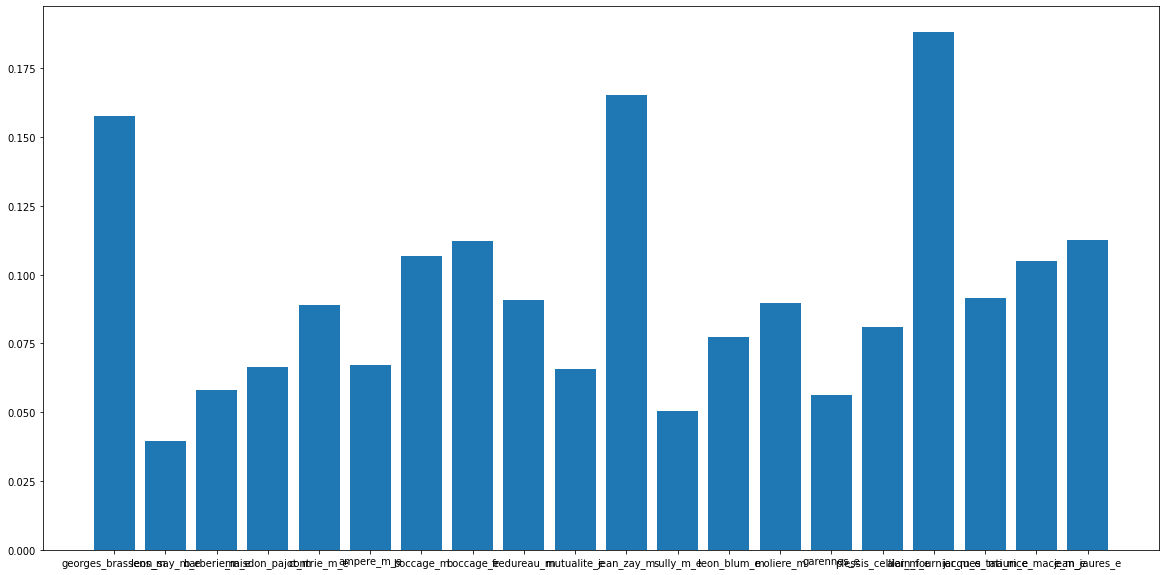

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.bar(df_res[df_res["gaspillage_pred"]<df_res["gaspillage_reel"]].etab, df_res[df_res["gaspillage_pred"]<df_res["gaspillage_reel"]].gaspillage_reel)
plt.show()

In [46]:
liste_bis = ["dervallieres_chezine_m_e", "maurice_mace_e", "chauviniere_e", "francoise_dolto_m_e", "ledru_rollin_sarah_bernhardt_m_e", 
            "charles_lebourg_m_e", "garennes_e", "coudray_e", "fonteny_m"]

In [47]:
df_res[df_res["etab"].isin(liste_bis)][df_res[df_res["etab"].isin(liste_bis)]["jours_manque_repas_pred"]<df_res[df_res["etab"].isin(liste_bis)]["jours_manque_repas_reel"]]

etab  gaspillage_reel  gaspillage_pred  \
11               francoise_dolto_m_e         0.082496         0.118351   
13                     chauviniere_e         0.113829         0.134491   
20               charles_lebourg_m_e         0.065130         0.085758   
37          dervallieres_chezine_m_e         0.155292         0.222338   
46                         fonteny_m         0.062816         0.091606   
69  ledru_rollin_sarah_bernhardt_m_e         0.092487         0.100973   
78                    maurice_mace_e         0.090311         0.134441   

    jours_manque_repas_reel  jours_manque_repas_pred  
11                       29                       13  
13                        8                        1  
20                       19                       12  
37                        9                        0  
46                       32                        8  
69                       33                       30  
78                       11                        0

In [48]:
#df_res[df_res["jours_manque_repas_pred"]<df_res["jours_manque_repas_reel"]]

- 19 établissements pour lesquels le gaspillage simulé est plus faible que le gaspillage réel (mais augmentation systématique du nb de jours avec manque de repas)

In [49]:
#for etab in liste_etab:
#    print("nb de dates prédit", len(dic_res[etab].index))